<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SMME_Modulo_1__Semana_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Curso Herramientas para la simulacion de Sistemas Dinamicos

Actividades Semana 5

Lenguaje R

In [ ]:
# @title
# Instalacion de paquetes
# deSolve es para la resolución numérica de ODEs
if (!requireNamespace("deSolve", quietly = TRUE)) {
  install.packages("deSolve")
}
# ggplot2, para gráficos
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}
# dplyr, Para manipulación de datos y creación de secuencias de tiempo
if (!requireNamespace("dplyr", quietly = TRUE)) {
  install.packages("dplyr")
}

# Cargar paquetes
library(deSolve)
library(ggplot2)
library(dplyr)

print("Paquetes cargados correctamente.")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "Paquetes cargados correctamente."


Ejercicio 1. Sistema RLC

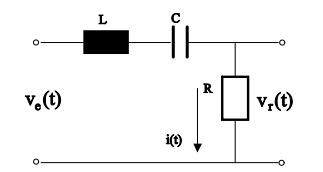

Fig. 5-1. Esquemático del circuito RLC.
Sea el sistema eléctrico de la Fig. 5-1, se requiere obtener la evolución temporal de la corriente para
diferentes tensiones de entrada.
Para el caso de asignarle valores unitarios a Ve, R, L y C, con entra entrada Heaviside unitaria se
obtuvo la solución analítica como

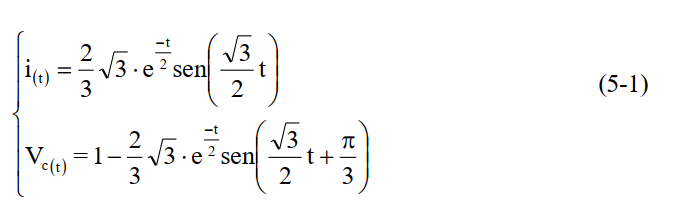

Expresión matricial
Para determinar la evolución de la corriente del circuito se pueden plantear las ecuaciones
diferenciales del mismo como,

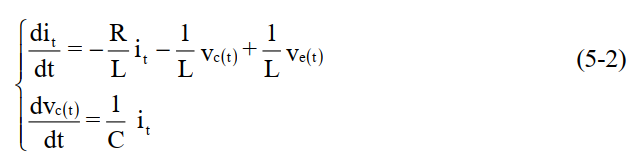

Las Ec. (5-2) se pueden expresar en una ecuación matricial-vectorial con las representaciones en
variables de estado definiendo a i, vc como variables de estado y a x como vector de estado, es decir
x=[ i vc]T se convierte en

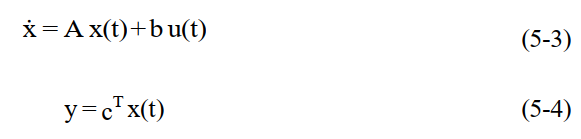

donde las matrices contienen a los coeficientes del circuito,

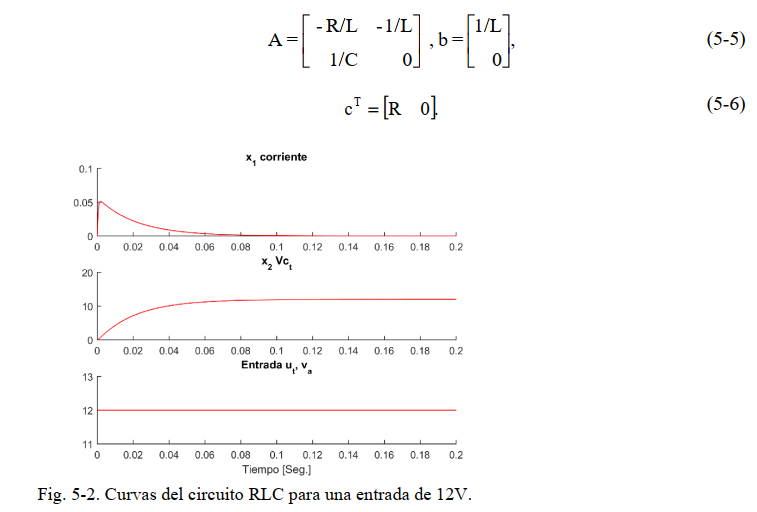

Nótese que las ecuaciones (5-1) son la solución al sistema para coeficientes específicos, en este caso,
de valor unitario.

Actividades.

1- Asignar valores a R=1 Ohm, L=1Hy, y C=1F.


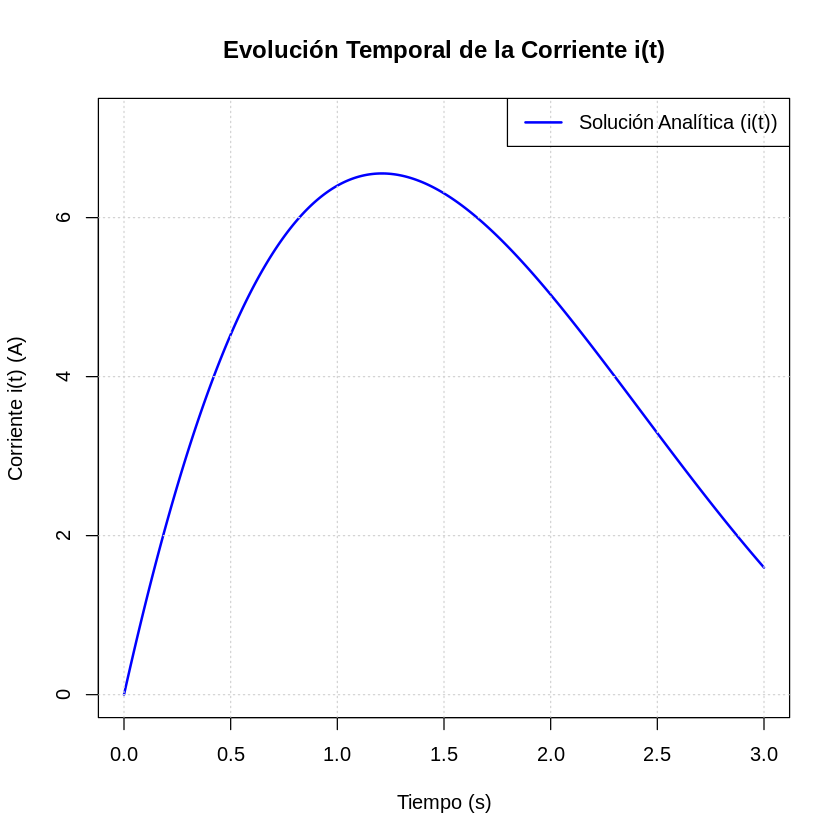

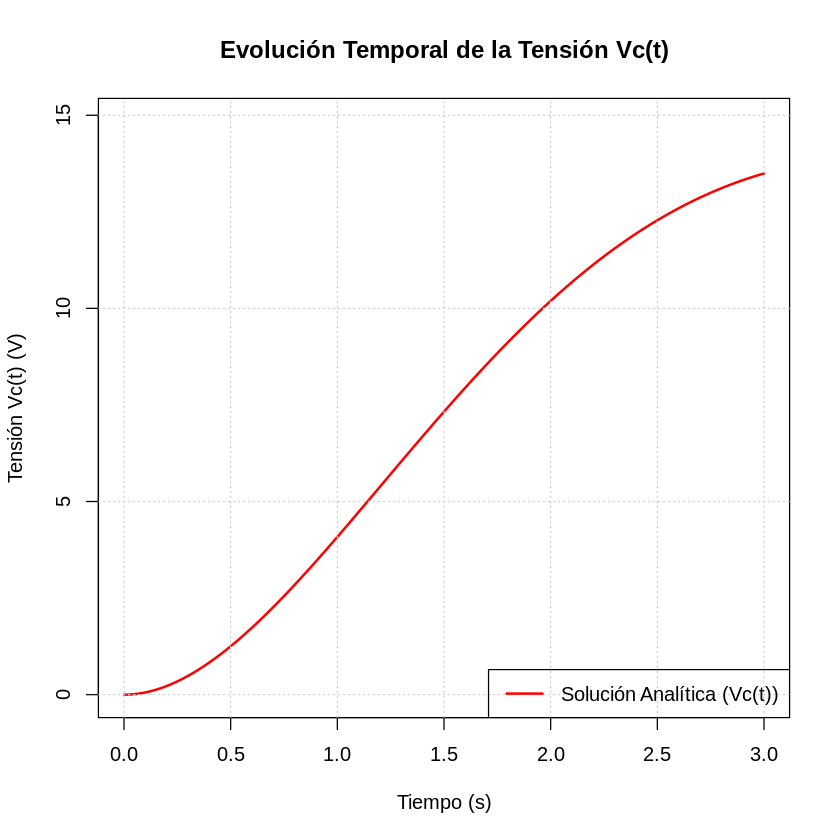

In [17]:
# @title
# Parámetros del circuito
R <- 1    # Resistencia en Ohmios
L <- 1    # Inductancia en Henrys
C <- 1    # Capacitancia en Faradios
Ve <- 12  # Tensión de entrada en Volts (escalón de 12V)

# Calcular los parámetros para la solución subamortiguada
# (Dado que alpha < omega_0, el sistema es subamortiguado) [cite: 82]
alpha <- R / (2 * L) # Coeficiente de amortiguamiento en Np/s [cite: 77]
omega_0 <- 1 / sqrt(L * C) # Frecuencia natural no amortiguada en rad/s [cite: 77]
omega_d <- sqrt(omega_0^2 - alpha^2) # Frecuencia amortiguada en rad/s [cite: 79]

# Definir el tiempo de simulación
t_final <- 3 # segundos
num_points <- 1000 # Número de puntos para la simulación
t <- seq(0, t_final, length.out = num_points)

# Solución analítica para la corriente i(t) con Ve = 12V [cite: 82]
# i(t) = (Ve * (2 * omega_d / (L * omega_0^2))) * exp(-alpha * t) * sin(omega_d * t)
# Simplificando la constante A y B de la forma i(t) = exp(-alpha*t) * (A*cos(omega_d*t) + B*sin(omega_d*t)) [cite: 78]
# Con las condiciones iniciales i(0) = 0, A = 0 [cite: 82]
# Y di/dt(t=0) = Ve/L = 12, se obtiene B = 2*sqrt(3)/3 * 12 [cite: 82]
i_t_analytical <- (12 * (2 * sqrt(3) / 3)) * exp(-alpha * t) * sin(omega_d * t)

# Solución analítica para la tensión en el capacitor Vc(t) con Ve = 12V [cite: 82]
Vc_t_analytical <- Ve * (1 - (2 * sqrt(3) / 3) * exp(-alpha * t) * sin(omega_d * t + pi / 3))

# Graficar los resultados
# Para la corriente i(t)
plot(t, i_t_analytical, type = "l", col = "blue", lwd = 2,
     main = "Evolución Temporal de la Corriente i(t)",
     xlab = "Tiempo (s)", ylab = "Corriente i(t) (A)",
     ylim = c(min(i_t_analytical), max(i_t_analytical) * 1.1))
grid()
legend("topright", legend = "Solución Analítica (i(t))", col = "blue", lty = 1, lwd = 2)

# Para la tensión Vc(t)
plot(t, Vc_t_analytical, type = "l", col = "red", lwd = 2,
     main = "Evolución Temporal de la Tensión Vc(t)",
     xlab = "Tiempo (s)", ylab = "Tensión Vc(t) (V)",
     ylim = c(min(Vc_t_analytical), max(Vc_t_analytical) * 1.1))
grid()
legend("bottomright", legend = "Solución Analítica (Vc(t))", col = "red", lty = 1, lwd = 2)

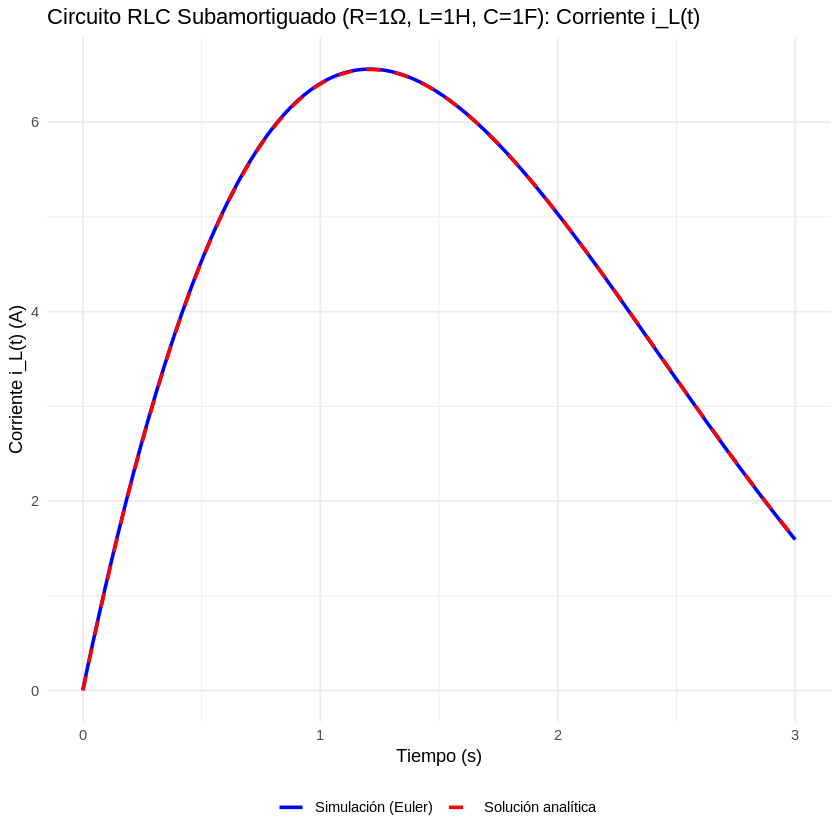

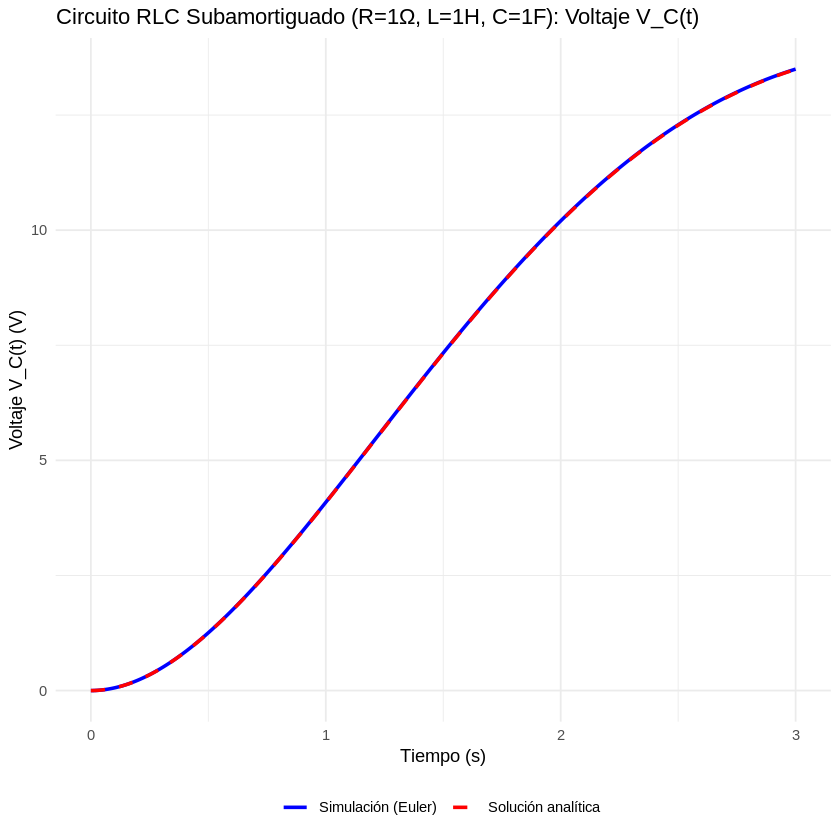

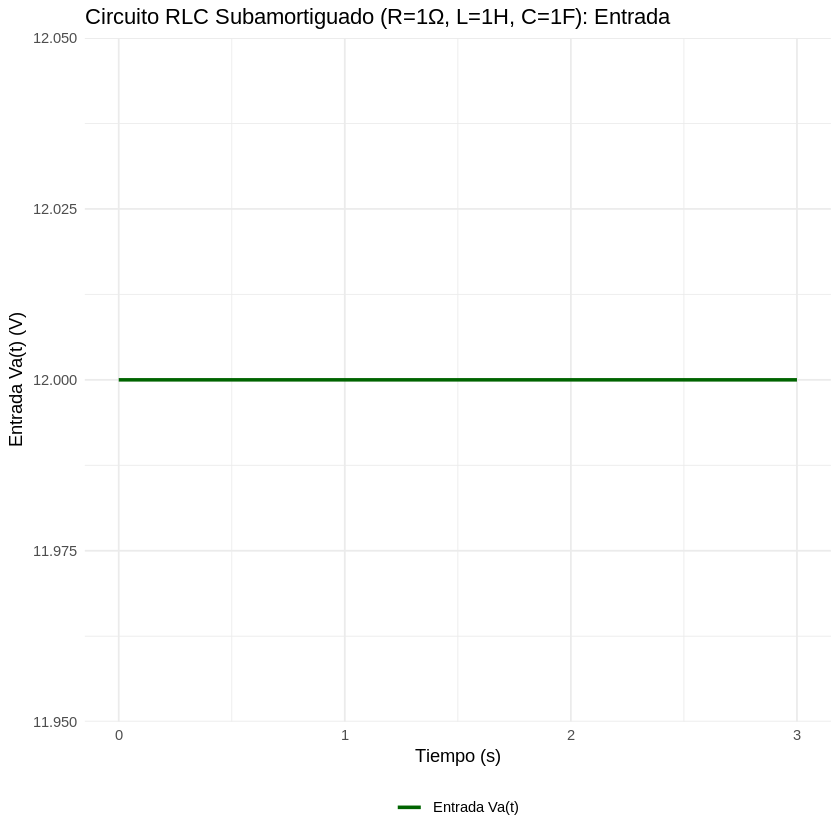

In [ ]:
# @title
# Curso HERRAMIENTAS DE CÁLCULO Y SIMULACIÓN DE PROCESOS DINÁMICOS
# Silvia Miró
# Modulo 1 - Semana 1

# Actividad 1- Asignar valores a R=1Ω, L=1Hy, y C=1F.
# a. Empleando la solución analítica, simular 3 segundos con una entrada de
# tensión escalón de 12V.
# b. Empleando el cálculo mediante Euler, verificar que coincida con el ítem
# anterior.

# Asegúrate de tener la librería ggplot2 instalada para las gráficas:
# install.packages("ggplot2")
library(ggplot2) # Para gráficos más avanzados

# --- Parámetros del circuito ---
R <- 1     # Ohm
L <- 1     # H
C <- 1     # F
h <- 1e-3  # Paso de tiempo
t_simul <- 3 # Tiempo de simulación en segundos

# --- Inicialización ---
t <- seq(0, t_simul, by = h) # Vector de tiempo
x1 <- numeric(length(t)) # Corriente i_L(t) (inicializada con ceros)
x2 <- numeric(length(t)) # Voltaje V_C(t) (inicializado con ceros)
u <- numeric(length(t))  # Entrada Va(t) (inicializada con ceros)

# Condiciones iniciales
x <- c(0, 0) # [i_L(0); V_C(0)]
Va <- 12     # Escalón de 12V

# --- Simulación con Euler ---
# Para simplificar y seguir la estructura del Python, implementaremos el bucle de Euler directamente.
# Aunque en R es común usar paquetes como 'deSolve' para ODEs, este enfoque
# se alinea más con la traducción directa del bucle explícito de Euler del Python.
for (ii in 1:length(t)) {
  # Matrices del sistema (definidas dentro del bucle para mayor claridad, aunque son constantes)
  # R/L, 1/L y 1/C son constantes
  di_dt <- (-R/L) * x[1] - (1/L) * x[2] + (1/L) * Va # Ecuación para di/dt
  dvc_dt <- (1/C) * x[1] # Ecuación para dVc/dt

  # Método de Euler
  x[1] <- x[1] + di_dt * h # Actualiza la corriente
  x[2] <- x[2] + dvc_dt * h # Actualiza el voltaje en C

  # Almacena los resultados
  x1[ii] <- x[1] # Almacena corriente
  x2[ii] <- x[2] # Almacena voltaje en C
  u[ii] <- Va # Almacena entrada
}

# --- Solución analítica (subamortiguada) ---
alpha <- R / (2 * L) # Coeficiente de amortiguamiento (0.5 Np/s)
omega_0 <- 1 / sqrt(L * C) # Frecuencia natural no amortiguada (1 rad/s)
omega_d <- omega_0 * sqrt(1 - (alpha / omega_0)^2) # Frecuencia amortiguada (√3/2 rad/s)

# Corriente i(t) analítica
i_analitico <- 12 * (2 * sqrt(3) / 3) * exp(-alpha * t) * sin(omega_d * t)

# Voltaje V_C(t) analítico
# Nota: La fórmula en el PDF y en el Python usa pi/3, asegúrate de que sea la correcta para tu contexto.
Vc_analitico <- 12 * (1 - (2 * sqrt(3) / 3) * exp(-alpha * t) * sin(omega_d * t + pi / 3))


# --- Gráficos ---
# Creando un data frame para usar con ggplot2
data_plot <- data.frame(
  Tiempo = t,
  Corriente_Euler = x1,
  Corriente_Analitica = i_analitico,
  VoltajeC_Euler = x2,
  VoltajeC_Analitica = Vc_analitico,
  Entrada_Va = u
)

# Gráfico de Corriente i_L(t)
plot_i <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Corriente_Euler, color = "Simulación (Euler)"), linewidth = 1) +
  geom_line(aes(y = Corriente_Analitica, color = "Solución analítica"), linetype = "dashed", linewidth = 1) +
  labs(
    title = "Circuito RLC Subamortiguado (R=1Ω, L=1H, C=1F): Corriente i_L(t)",
    y = "Corriente i_L(t) (A)",
    x = "Tiempo (s)"
  ) +
  scale_color_manual(values = c("Simulación (Euler)" = "blue", "Solución analítica" = "red")) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  guides(color = guide_legend(title = NULL))

# Gráfico de Voltaje V_C(t)
plot_vc <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = VoltajeC_Euler, color = "Simulación (Euler)"), linewidth = 1) +
  geom_line(aes(y = VoltajeC_Analitica, color = "Solución analítica"), linetype = "dashed", linewidth = 1) +
  labs(
    title = "Circuito RLC Subamortiguado (R=1Ω, L=1H, C=1F): Voltaje V_C(t)",
    y = "Voltaje V_C(t) (V)",
    x = "Tiempo (s)"
  ) +
  scale_color_manual(values = c("Simulación (Euler)" = "blue", "Solución analítica" = "red")) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  guides(color = guide_legend(title = NULL))

# Gráfico de Entrada Va(t)
plot_u <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Entrada_Va, color = "Entrada Va(t)"), linewidth = 1) +
  labs(
    title = "Circuito RLC Subamortiguado (R=1Ω, L=1H, C=1F): Entrada",
    y = "Entrada Va(t) (V)",
    x = "Tiempo (s)"
  ) +
  scale_color_manual(values = c("Entrada Va(t)" = "darkgreen")) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  guides(color = guide_legend(title = NULL))

# Imprimir las gráficas
print(plot_i)
print(plot_vc)
print(plot_u)

Se observa que la simulacion con el metodo de Euler coincide con la solucion analitica, tanto para la corriente i(t) como para el voltaje vc(t), durante el tiempo de simulacion, con los valores unitarios de R, L y C y una entrada Ve= 12 V

2- Asignar valores a R=2,2e3 Ohm, L=10 e-6 Hy, y C=100e-9 F. Obtener simulaciones que permitan
estudiar la dinámica del sistema, con una entrada de tensión escalón de 12V.

Warning message in sqrt(1 - (alpha/omega_0)^2):
“NaNs produced”
Warning message:
“Removed 1000001 rows containing missing values or values outside the scale
range (`geom_line()`).”
Warning message:
“Removed 1000001 rows containing missing values or values outside the scale
range (`geom_line()`).”


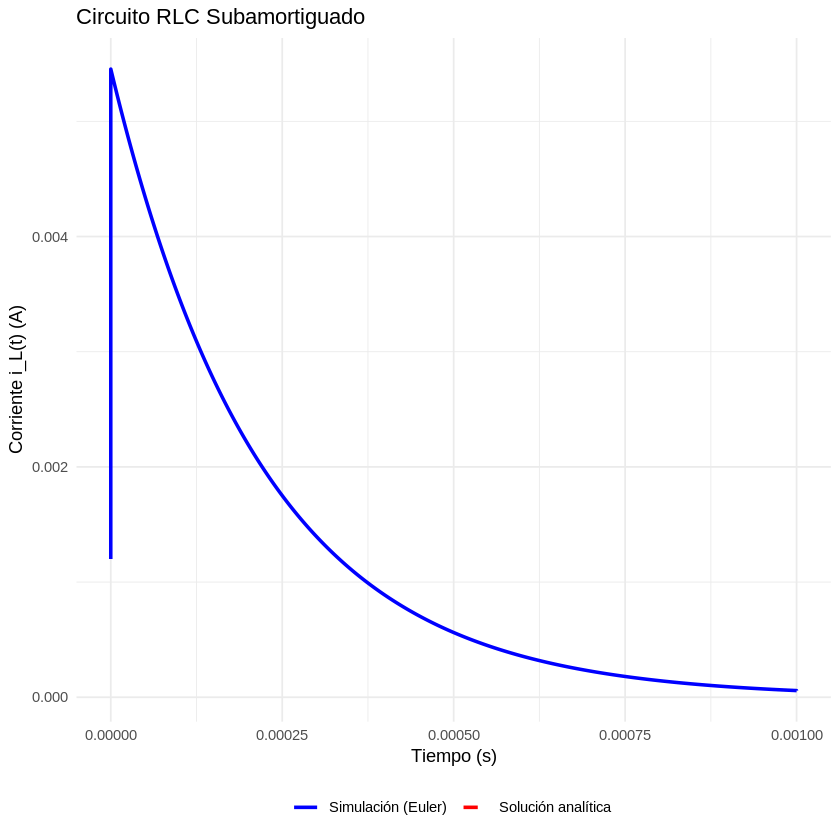

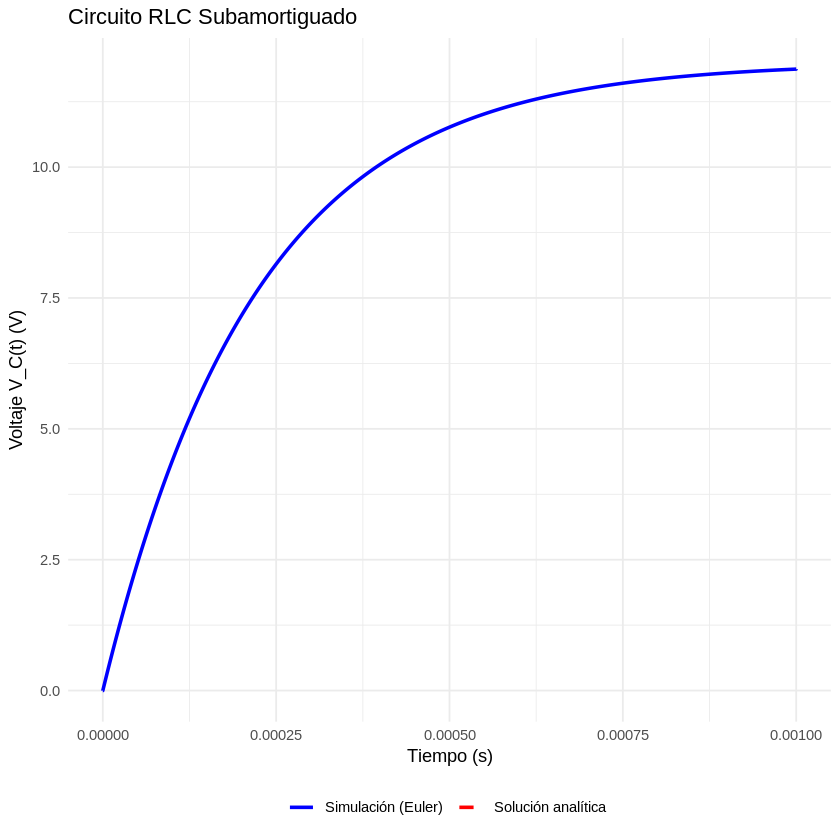

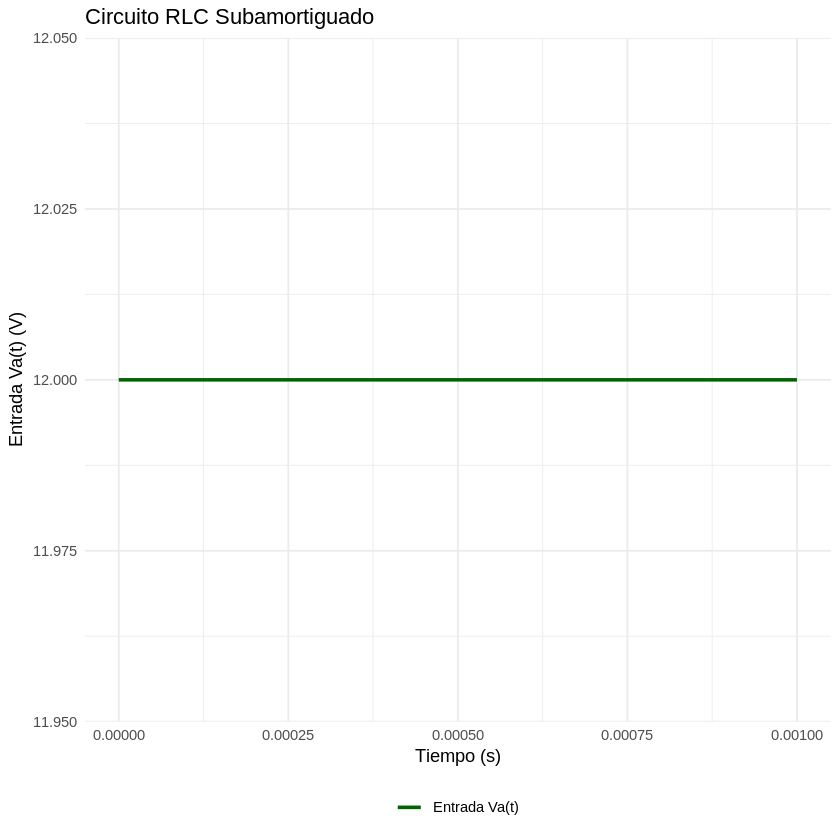

In [ ]:
# @title

# --- Parámetros del circuito ---
R <- 2.2e3     # Ohm
L <- 10e-6     # H
C <- 100e-9    # F
h <- 1e-9  # Paso de tiempo
t_simul <- 1e-3 # Tiempo de simulación en segundos

# --- Inicialización ---
t <- seq(0, t_simul, by = h) # Vector de tiempo
x1 <- numeric(length(t)) # Corriente i_L(t) (inicializada con ceros)
x2 <- numeric(length(t)) # Voltaje V_C(t) (inicializado con ceros)
u <- numeric(length(t))  # Entrada Va(t) (inicializada con ceros)

# Condiciones iniciales
x <- c(0, 0) # [i_L(0); V_C(0)]
Va <- 12     # Escalón de 12V

# --- Simulación con Euler ---
# Para simplificar y seguir la estructura del Python, implementaremos el bucle de Euler directamente.
# Aunque en R es común usar paquetes como 'deSolve' para ODEs, este enfoque
# se alinea más con la traducción directa del bucle explícito de Euler del Python.
for (ii in 1:length(t)) {
  # Matrices del sistema (definidas dentro del bucle para mayor claridad, aunque son constantes)
  # R/L, 1/L y 1/C son constantes
  di_dt <- (-R/L) * x[1] - (1/L) * x[2] + (1/L) * Va # Ecuación para di/dt
  dvc_dt <- (1/C) * x[1] # Ecuación para dVc/dt

  # Método de Euler
  x[1] <- x[1] + di_dt * h # Actualiza la corriente
  x[2] <- x[2] + dvc_dt * h # Actualiza el voltaje en C

  # Almacena los resultados
  x1[ii] <- x[1] # Almacena corriente
  x2[ii] <- x[2] # Almacena voltaje en C
  u[ii] <- Va # Almacena entrada
}

# --- Solución analítica (subamortiguada) ---
alpha <- R / (2 * L) # Coeficiente de amortiguamiento (0.5 Np/s)
omega_0 <- 1 / sqrt(L * C) # Frecuencia natural no amortiguada (1 rad/s)
omega_d <- omega_0 * sqrt(1 - (alpha / omega_0)^2) # Frecuencia amortiguada (√3/2 rad/s)

# Corriente i(t) analítica
i_analitico <- 12 * (2 * sqrt(3) / 3) * exp(-alpha * t) * sin(omega_d * t)

# Voltaje V_C(t) analítico
# Nota: La fórmula en el PDF y en el Python usa pi/3, asegúrate de que sea la correcta para tu contexto.
Vc_analitico <- 12 * (1 - (2 * sqrt(3) / 3) * exp(-alpha * t) * sin(omega_d * t + pi / 3))


# --- Gráficos ---
# Creando un data frame para usar con ggplot2
data_plot <- data.frame(
  Tiempo = t,
  Corriente_Euler = x1,
  Corriente_Analitica = i_analitico,
  VoltajeC_Euler = x2,
  VoltajeC_Analitica = Vc_analitico,
  Entrada_Va = u
)

# Gráfico de Corriente i_L(t)
plot_i <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Corriente_Euler, color = "Simulación (Euler)"), linewidth = 1) +
  geom_line(aes(y = Corriente_Analitica, color = "Solución analítica"), linetype = "dashed", linewidth = 1) +
  labs(
    title = "Circuito RLC Subamortiguado",
    y = "Corriente i_L(t) (A)",
    x = "Tiempo (s)"
  ) +
  scale_color_manual(values = c("Simulación (Euler)" = "blue", "Solución analítica" = "red")) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  guides(color = guide_legend(title = NULL))

# Gráfico de Voltaje V_C(t)
plot_vc <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = VoltajeC_Euler, color = "Simulación (Euler)"), linewidth = 1) +
  geom_line(aes(y = VoltajeC_Analitica, color = "Solución analítica"), linetype = "dashed", linewidth = 1) +
  labs(
    title = "Circuito RLC Subamortiguado",
    y = "Voltaje V_C(t) (V)",
    x = "Tiempo (s)"
  ) +
  scale_color_manual(values = c("Simulación (Euler)" = "blue", "Solución analítica" = "red")) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  guides(color = guide_legend(title = NULL))

# Gráfico de Entrada Va(t)
plot_u <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Entrada_Va, color = "Entrada Va(t)"), linewidth = 1) +
  labs(
    title = "Circuito RLC Subamortiguado",
    y = "Entrada Va(t) (V)",
    x = "Tiempo (s)"
  ) +
  scale_color_manual(values = c("Entrada Va(t)" = "darkgreen")) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  guides(color = guide_legend(title = NULL))

# Imprimir las gráficas
print(plot_i)
print(plot_vc)
print(plot_u)

3- Asumir que la tensión de entrada cambia de signo cada 1ms.
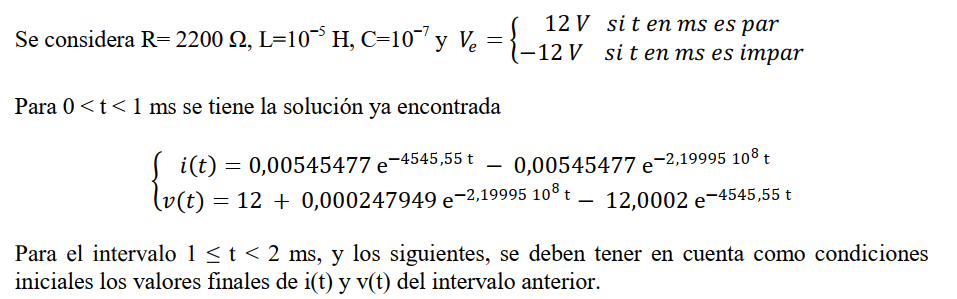

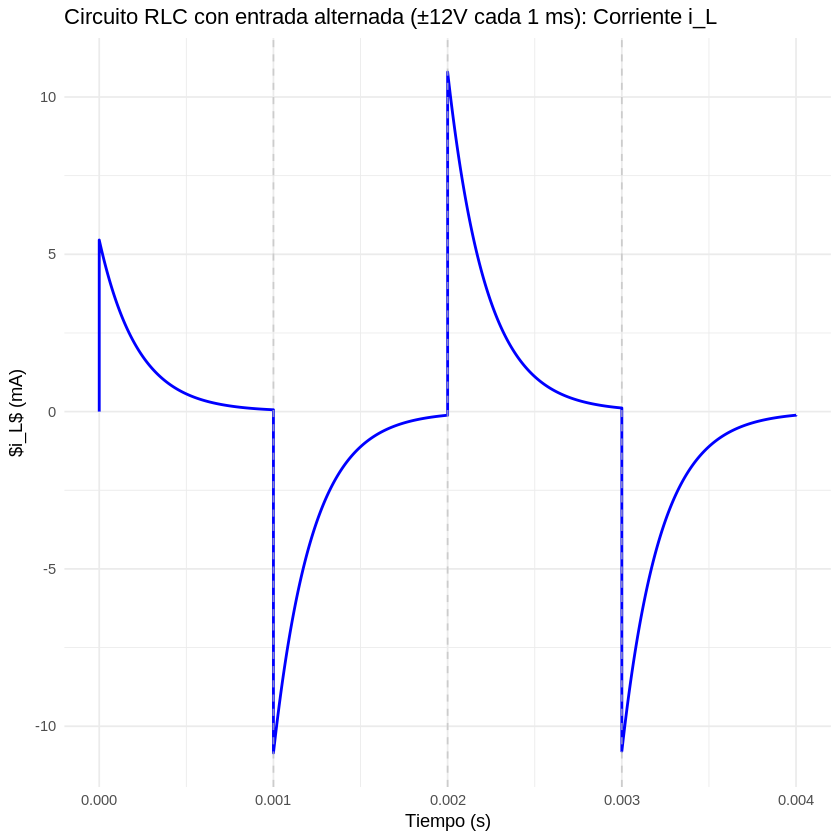

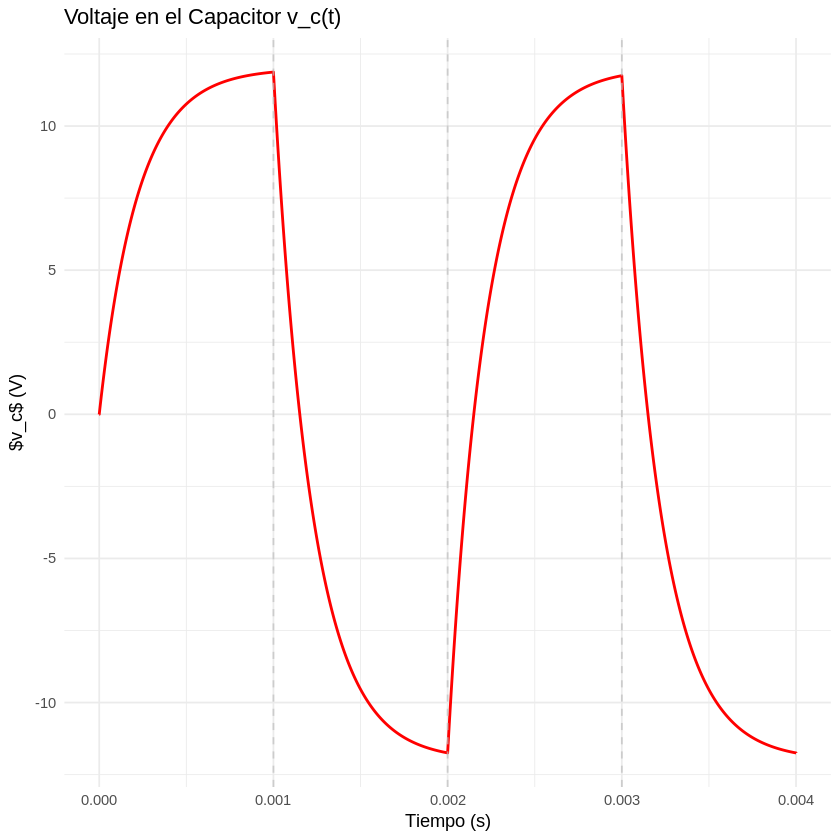

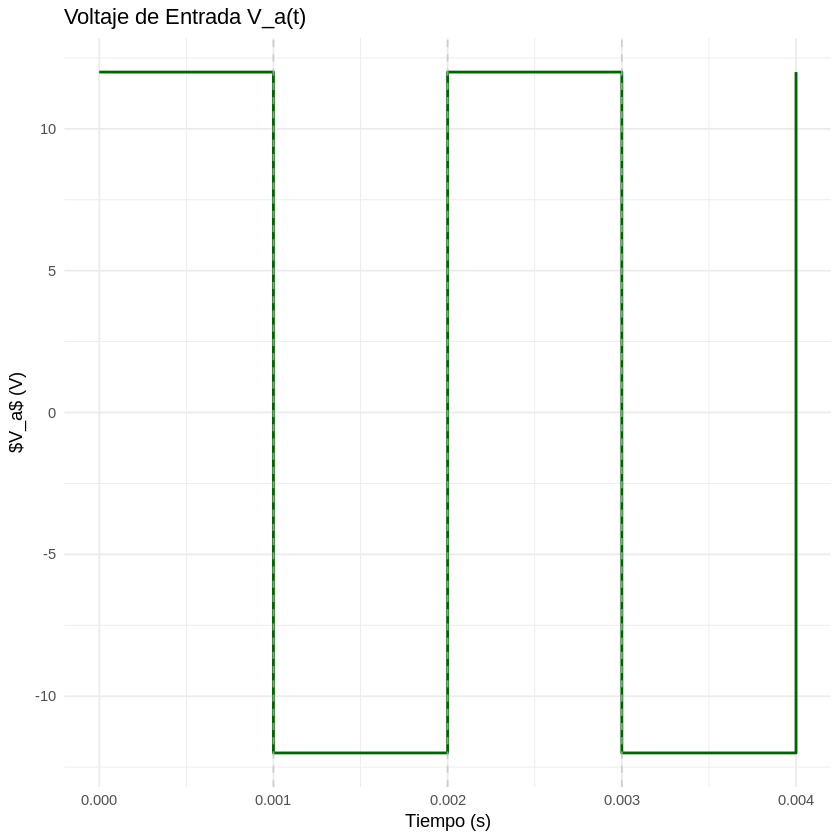

In [ ]:
# @title
# install.packages("ggplot2")
library(ggplot2) # Para gráficos avanzados

# --- Parámetros del circuito ---
R <- 2.2e3   # 2.2 kOhm = 2200 Ohm
L <- 10e-6   # 10 microHenrios = 10e-6 H
C <- 100e-9  # 100 nF = 100e-9 F
h <- 1e-9    # Paso de tiempo en segundos
t_simul <- 4e-3 # Tiempo de simulación en segundos (4 ms)

# --- Inicialización de variables ---
# Calcular el número de puntos
num_points <- floor(t_simul / h) + 1 # +1 para incluir el punto final si t_simul es múltiplo exacto de h

# Vectors para almacenar los resultados
t_vector <- numeric(num_points)      # Vector de tiempo
x1_current <- numeric(num_points)    # Corriente (i_L)
x2_voltage <- numeric(num_points)    # Voltaje en capacitor (v_c)
u_input <- numeric(num_points)       # Voltaje de entrada (V_a)

# Condiciones iniciales
Va_current <- 12 # Voltaje inicial (empezamos con +12V)
# Estado inicial [i_L(0); v_c(0)]
state_vector <- c(0, 0) # R usa un vector numérico para esto

# --- Simulación con Euler ---
for (ii in 1:num_points) {
  # Calcular el tiempo actual
  current_t <- (ii - 1) * h # R usa índices base 1, Python usa base 0

  # Cambio de polaridad cada 1 ms (como en el código Python)
  if (current_t >= 1e-3 && current_t < 2e-3) {
    Va_current <- -12
  } else if (current_t >= 2e-3 && current_t < 3e-3) {
    Va_current <- 12
  } else if (current_t >= 3e-3 && current_t < 4e-3) {
    Va_current <- -12
  } else if (current_t >= 4e-3) { # Para tiempos mayores al final de la simulación
    Va_current <- 12 # Asume que el último período negativo vuelve a positivo si sim_t fuera mayor
  }

  # Almacenamiento de resultados en el paso actual antes de la actualización
  t_vector[ii] <- current_t
  u_input[ii] <- Va_current
  x1_current[ii] <- state_vector[1]   # Corriente i_L
  x2_voltage[ii] <- state_vector[2]   # Voltaje v_c

  # Ecuaciones diferenciales (dx/dt = A*x + B*u)
  # di_dt = (-R/L) * i - (1/L) * Vc + (1/L) * Va
  # dVc_dt = (1/C) * i
  di_dt <- (-R/L) * state_vector[1] - (1/L) * state_vector[2] + (1/L) * Va_current
  dvc_dt <- (1/C) * state_vector[1]

  # Integración del sistema (Método de Euler)
  state_vector[1] <- state_vector[1] + di_dt * h
  state_vector[2] <- state_vector[2] + dvc_dt * h
}

# --- Preparar los datos para graficar con ggplot2 ---
data_plot <- data.frame(
  Tiempo = t_vector,
  Corriente_mA = x1_current * 1000, # Convertimos a mA para el gráfico
  Voltaje_C = x2_voltage,
  Voltaje_Entrada = u_input
)

# --- Gráficos con ggplot2 ---

# Gráfico de Corriente en el inductor
plot_i <- ggplot(data_plot, aes(x = Tiempo, y = Corriente_mA)) +
  geom_line(color = "blue", linewidth = 0.8) +
  labs(
    title = "Circuito RLC con entrada alternada (±12V cada 1 ms): Corriente i_L",
    x = "Tiempo (s)",
    y = "$i_L$ (mA)"
  ) +
  # Añadir líneas verticales para los cambios de polaridad
  geom_vline(xintercept = c(1e-3, 2e-3, 3e-3), linetype = "dashed", color = "gray", alpha = 0.7) +
  theme_minimal() + # Incluye una cuadrícula por defecto
  theme(legend.position = "none") # Sin leyenda si solo hay una línea

# Gráfico de Voltaje en el capacitor
plot_vc <- ggplot(data_plot, aes(x = Tiempo, y = Voltaje_C)) +
  geom_line(color = "red", linewidth = 0.8) +
  labs(
    title = "Voltaje en el Capacitor v_c(t)",
    x = "Tiempo (s)",
    y = "$v_c$ (V)"
  ) +
  # Añadir líneas verticales para los cambios de polaridad
  geom_vline(xintercept = c(1e-3, 2e-3, 3e-3), linetype = "dashed", color = "gray", alpha = 0.7) +
  theme_minimal() + # Incluye una cuadrícula por defecto
  theme(legend.position = "none")

# Gráfico de Voltaje de entrada
plot_u <- ggplot(data_plot, aes(x = Tiempo, y = Voltaje_Entrada)) +
  geom_line(color = "darkgreen", linewidth = 0.8) +
  labs(
    title = "Voltaje de Entrada V_a(t)",
    x = "Tiempo (s)",
    y = "$V_a$ (V)"
  ) +
  # Añadir líneas verticales para los cambios de polaridad
  geom_vline(xintercept = c(1e-3, 2e-3, 3e-3), linetype = "dashed", color = "gray", alpha = 0.7) +
  theme_minimal() + # Incluye una cuadrícula por defecto
  theme(legend.position = "none")

# Imprimir las gráficas
print(plot_i)
print(plot_vc)
print(plot_u)

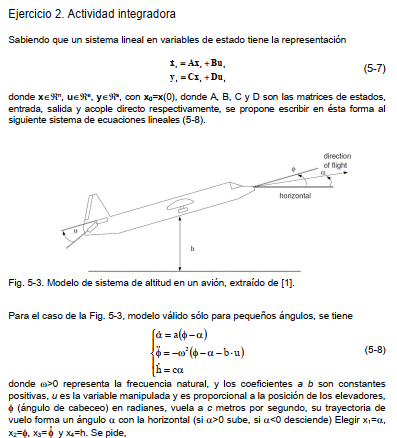
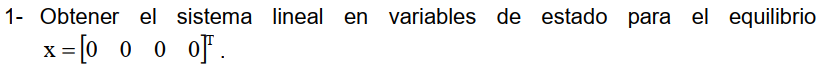

Autovalores de la matriz A:
[1] -0.005+0.1999375i -0.005-0.1999375i  0.000+0.0000000i  0.000+0.0000000i


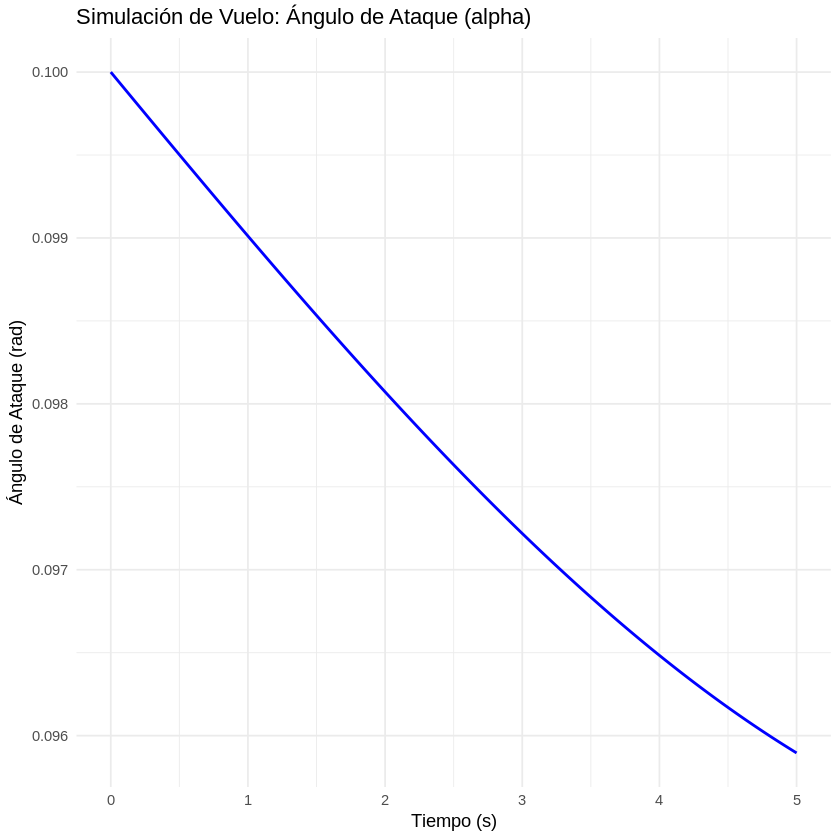

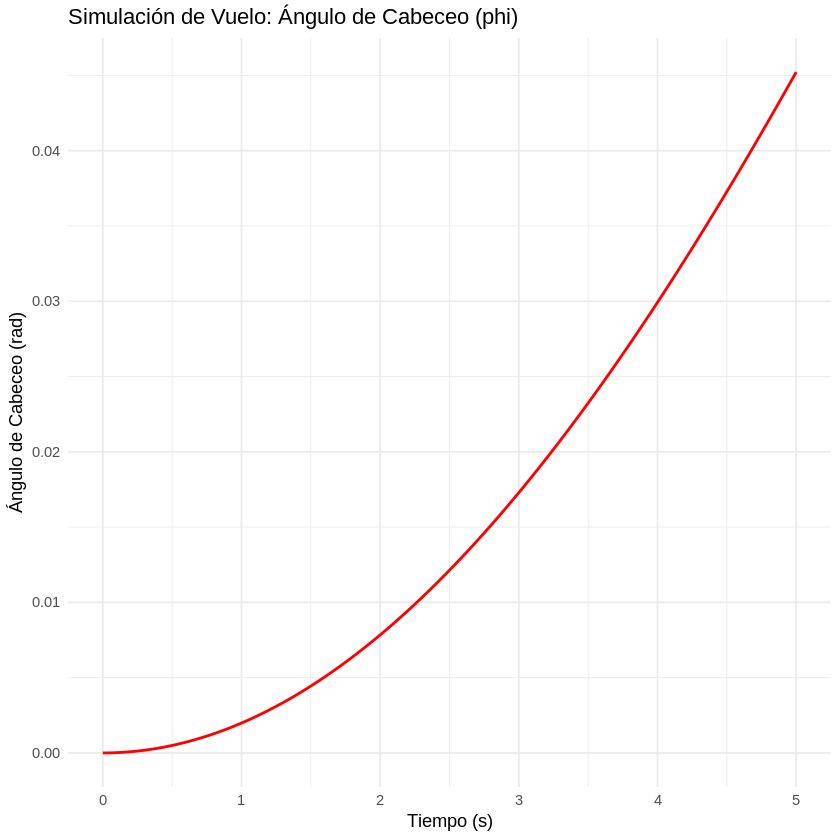

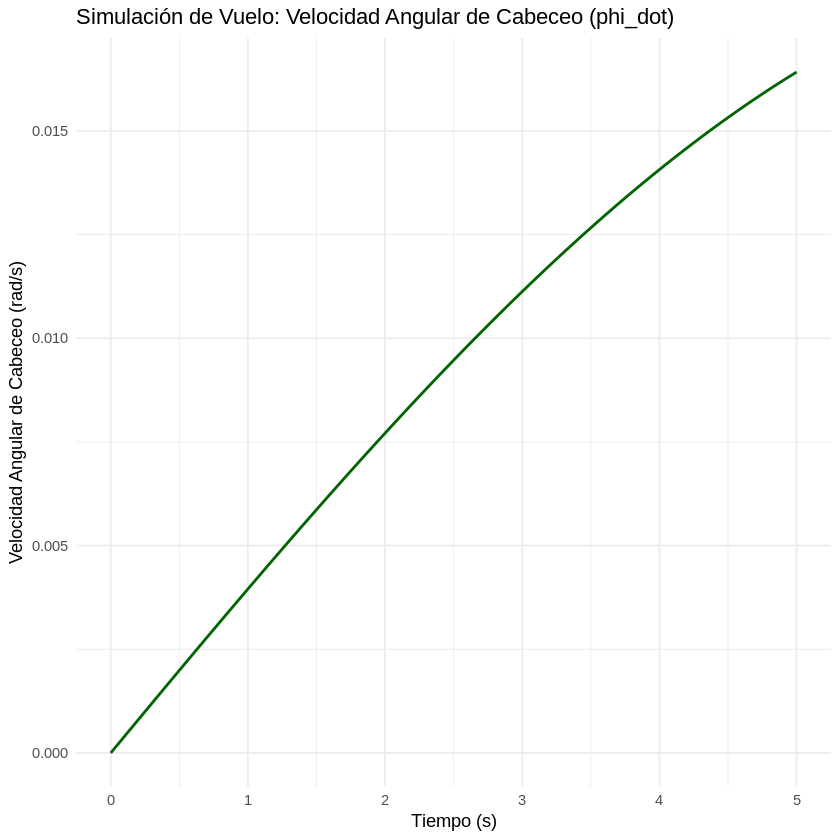

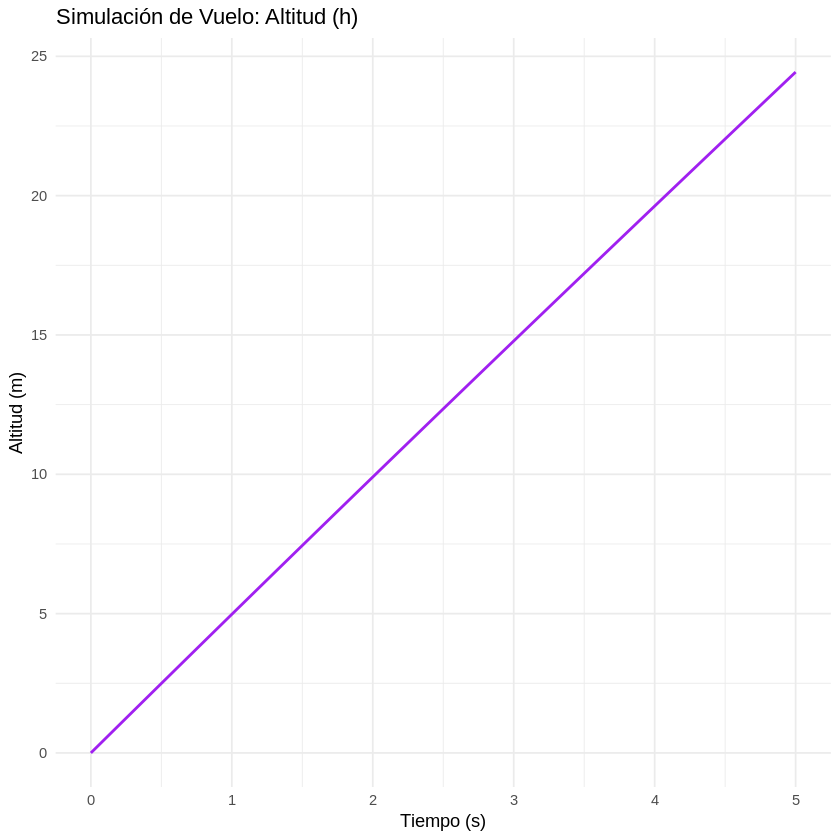

In [18]:
# @title
# Script en R para la simulación del modelo de vuelo longitudinal linealizado
# Curso HERRAMIENTAS DE CÁLCULO Y SIMULACIÓN DE PROCESOS DINÁMICOS
# Silvia Miró
# Modulo 1 - Semana 1

# Asegúrate de tener la librería ggplot2 instalada para las gráficas:
# install.packages("ggplot2")
library(ggplot2) # Para gráficos avanzados

# --- Parámetros del modelo ---
omega <- 0.2    # Frecuencia natural (rad/s)
a <- 0.01       # Coeficiente de amortiguamiento
b <- 2          # Constante de control
c_vel <- 50     # Velocidad de vuelo (m/s) (renombrado 'c' a 'c_vel' para evitar conflicto con la función c() de R)

# --- Parámetros de la simulación ---
h <- 1e-3                   # Paso de tiempo (s)
t_final <- 5               # Tiempo de simulación (s)
t <- seq(0, t_final, by = h) # Vector de tiempo
n_steps <- length(t)       # Número de pasos

# --- Matrices del sistema lineal ---
# En R, las matrices se rellenan por columna por defecto, lo cual coincide con tu Octave/Python.
A <- matrix(c(-a, 0, omega^2, c_vel,     # Columna 1 de la matriz A
              a, 0, -omega^2, 0,        # Columna 2 de la matriz A
              0, 1, 0, 0,              # Columna 3 de la matriz A
              0, 0, 0, 0),             # Columna 4 de la matriz A
            nrow = 4, ncol = 4, byrow = FALSE)

B <- matrix(c(0, 0, omega^2 * b, 0),    # Columna 1 de la matriz B
            nrow = 4, ncol = 1)

#---Autovalores de la matriz A ---
eigenvalues_A <- eigen(A)$values
cat('Autovalores de la matriz A:\n')
print(eigenvalues_A)

# --- Condición inicial ---
x0 <- c(0.1,    # alpha(0) - Angulo de ataque inicial
        0,      # phi(0)   - Angulo de cabeceo inicial
        0,      # phi_dot(0) - Velocidad angular de cabeceo inicial
        0)      # h(0)     - Altitud inicial

# --- Inicialización de la matriz de estados ---
# x tendrá 4 filas (para las 4 variables de estado) y n_steps columnas (para cada paso de tiempo)
x <- matrix(0, nrow = 4, ncol = n_steps)
x[, 1] <- x0 # Asignar la condición inicial al primer paso de tiempo

# --- Entrada de control (nula para evaluar el comportamiento inherente) ---
u <- matrix(0, nrow = 1, ncol = n_steps) # Un solo valor de control por paso, todo ceros

# --- Simulación con el método de Euler hacia adelante ---
for (n in 1:(n_steps - 1)) {
    # x(n+1) = x(n) + h * (A * x(n) + B * u(n))
    x[, n + 1] <- x[, n] + h * (A %*% x[, n] + B %*% u[, n])
}

# --- Preparar los datos para graficar con ggplot2 ---
# Transponer la matriz x para que las filas sean los pasos de tiempo y las columnas las variables de estado
x_df <- as.data.frame(t(x))
colnames(x_df) <- c("alpha", "phi", "phi_dot", "h") # Nombres de las columnas
x_df$Tiempo <- t # Añadir el vector de tiempo al data frame para graficar

# Graficar los resultados de cada variable de estado

# Gráfico de Angulo de ataque (alpha)
plot_alpha <- ggplot(x_df, aes(x = Tiempo, y = alpha)) +
  geom_line(color = "blue", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo: Ángulo de Ataque (alpha)",
    x = "Tiempo (s)",
    y = "Ángulo de Ataque (rad)"
  ) +
  theme_minimal() # theme_minimal() ya proporciona una cuadrícula por defecto

# Gráfico de Ángulo de cabeceo (phi)
plot_phi <- ggplot(x_df, aes(x = Tiempo, y = phi)) +
  geom_line(color = "red", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo: Ángulo de Cabeceo (phi)",
    x = "Tiempo (s)",
    y = "Ángulo de Cabeceo (rad)"
  ) +
  theme_minimal()

# Gráfico de Velocidad angular de cabeceo (phi_dot)
plot_phi_dot <- ggplot(x_df, aes(x = Tiempo, y = phi_dot)) +
  geom_line(color = "darkgreen", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo: Velocidad Angular de Cabeceo (phi_dot)",
    x = "Tiempo (s)",
    y = "Velocidad Angular de Cabeceo (rad/s)"
  ) +
  theme_minimal()

# Gráfico de Altitud (h)
plot_h <- ggplot(x_df, aes(x = Tiempo, y = h)) +
  geom_line(color = "purple", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo: Altitud (h)",
    x = "Tiempo (s)",
    y = "Altitud (m)"
  ) +
  theme_minimal()

# Imprimir las gráficas
print(plot_alpha)
print(plot_phi)
print(plot_phi_dot)
print(plot_h)

# Opcional: Para guardar los datos (similar a save en Octave)
# save(t, x, eigenvalues_A, file = "simulacion_vuelo.RData")
# write.csv(x_df, "simulacion_vuelo_resultados.csv", row.names = FALSE)

2- Obtener la solución numérica del sistema lineal para evaluar cuantitativamente el
comportamiento con intención de verificar el correcto planteo. Para hacerlo, se les
asignan los valores siguientes a los parámetros, son =0,2; a=0,01; b=2; c=100
m/s, (es decir, 360Km/h), t=10-3; y el tiempo de simulación de 5 segundos.

Autovalores de la matriz A (con c_vel = 100 m/s):
[1] -0.005+0.1999375i -0.005-0.1999375i  0.000+0.0000000i  0.000+0.0000000i


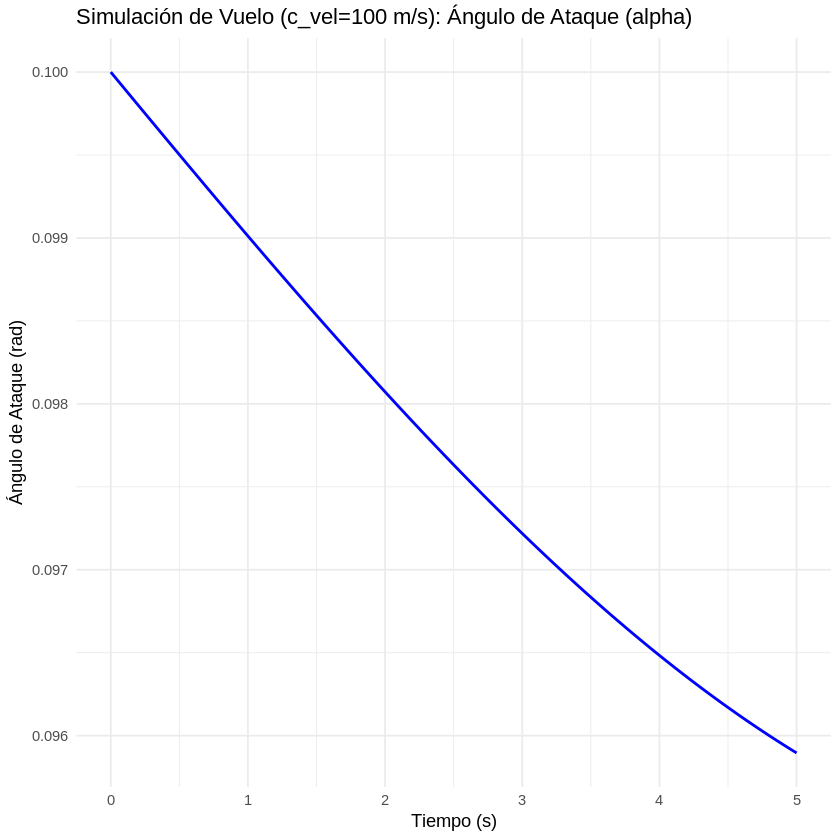

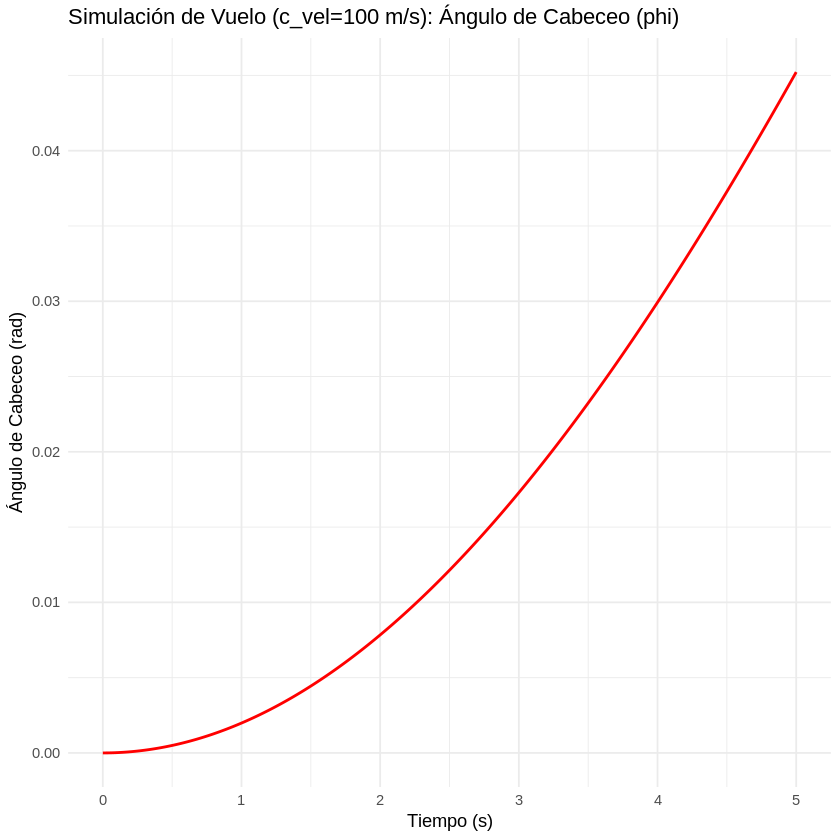

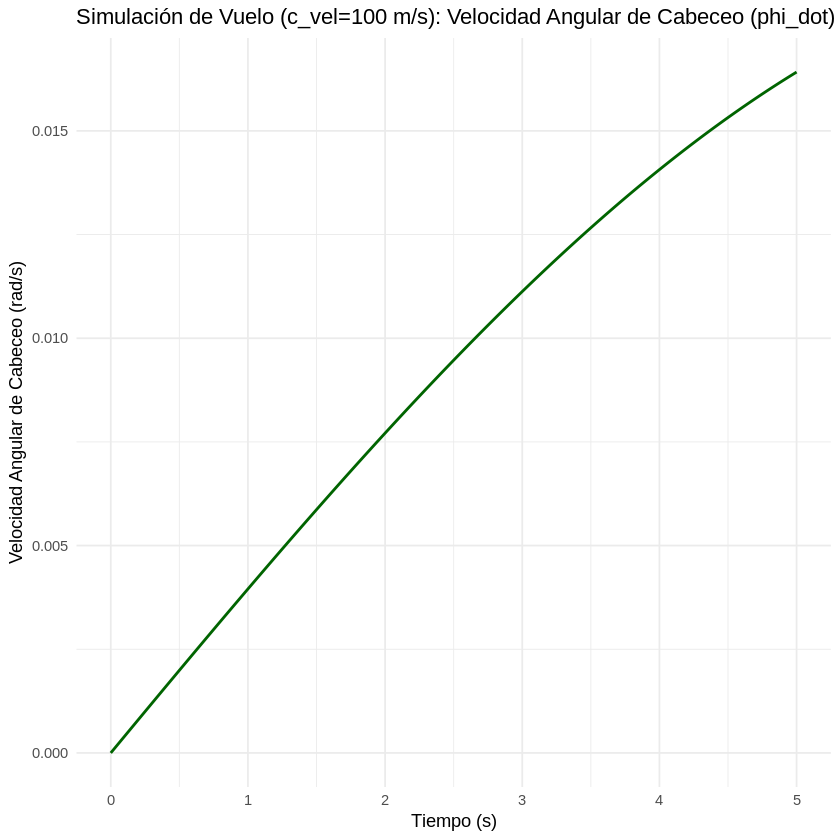

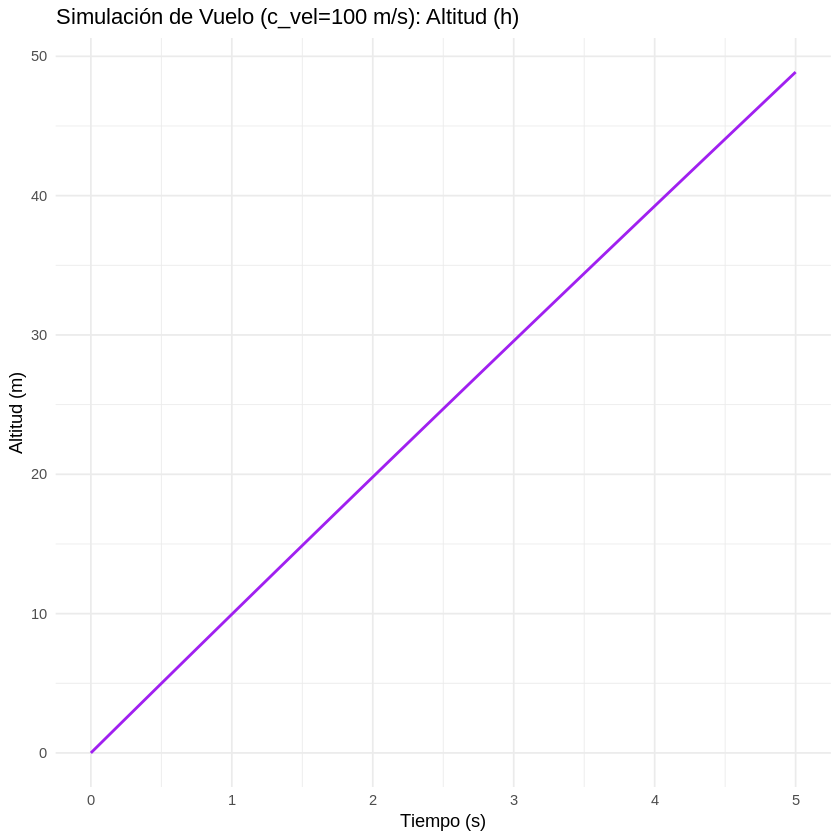

In [ ]:
# @title
# Script en R para la simulación del modelo de vuelo longitudinal linealizado
# Actividad: Obtener la solución numérica del sistema lineal con nuevos parámetros.

# Asegúrate de tener la librería ggplot2 instalada para las gráficas:
# install.packages("ggplot2")
library(ggplot2) # Para gráficos avanzados

# --- Parámetros del modelo (Actividad 2 del vuelo del avión) ---
omega <- 0.2    # Frecuencia natural (rad/s)
a <- 0.01       # Coeficiente de amortiguamiento
b <- 2          # Constante de control
c_vel <- 100    # Velocidad de vuelo (m/s) (¡Nuevo valor: 100 m/s!)

# --- Parámetros de la simulación (Actividad 2 del vuelo del avión) ---
h <- 1e-3                   # Paso de tiempo (s)
t_final <- 5                # Tiempo de simulación (s) (¡Nuevo valor: 5 segundos!)
t <- seq(0, t_final, by = h) # Vector de tiempo
n_steps <- length(t)       # Número de pasos

# --- Matrices del sistema lineal ---
# A y B dependen de los parámetros actualizados
A <- matrix(c(-a, 0, omega^2, c_vel,     # Columna 1 de la matriz A
              a, 0, -omega^2, 0,        # Columna 2 de la matriz A
              0, 1, 0, 0,              # Columna 3 de la matriz A
              0, 0, 0, 0),             # Columna 4 de la matriz A
            nrow = 4, ncol = 4, byrow = FALSE)

B <- matrix(c(0, 0, omega^2 * b, 0),    # Columna 1 de la matriz B
            nrow = 4, ncol = 1)

#---Autovalores de la matriz A ---
eigenvalues_A <- eigen(A)$values
cat('Autovalores de la matriz A (con c_vel = 100 m/s):\n')
print(eigenvalues_A)

# --- Condición inicial (se mantiene igual) ---
x0 <- c(0.1,    # alpha(0) - Angulo de ataque inicial
        0,      # phi(0)   - Angulo de cabeceo inicial
        0,      # phi_dot(0) - Velocidad angular de cabeceo inicial
        0)      # h(0)     - Altitud inicial

# --- Inicialización de la matriz de estados ---
x <- matrix(0, nrow = 4, ncol = n_steps)
x[, 1] <- x0 # Asignar la condición inicial al primer paso de tiempo

# --- Entrada de control (nula para evaluar el comportamiento inherente) ---
u <- matrix(0, nrow = 1, ncol = n_steps) # Un solo valor de control por paso, todo ceros

# --- Simulación con el método de Euler hacia adelante ---
for (n in 1:(n_steps - 1)) {
    # x(n+1) = x(n) + h * (A * x(n) + B * u(n))
    x[, n + 1] <- x[, n] + h * (A %*% x[, n] + B %*% u[, n])
}

# --- Preparar los datos para graficar con ggplot2 ---
x_df <- as.data.frame(t(x))
colnames(x_df) <- c("alpha", "phi", "phi_dot", "h") # Nombres de las columnas
x_df$Tiempo <- t # Añadir el vector de tiempo al data frame para graficar

# Graficar los resultados de cada variable de estado

# Gráfico de Angulo de ataque (alpha)
plot_alpha <- ggplot(x_df, aes(x = Tiempo, y = alpha)) +
  geom_line(color = "blue", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo (c_vel=100 m/s): Ángulo de Ataque (alpha)",
    x = "Tiempo (s)",
    y = "Ángulo de Ataque (rad)"
  ) +
  theme_minimal()

# Gráfico de Ángulo de cabeceo (phi)
plot_phi <- ggplot(x_df, aes(x = Tiempo, y = phi)) +
  geom_line(color = "red", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo (c_vel=100 m/s): Ángulo de Cabeceo (phi)",
    x = "Tiempo (s)",
    y = "Ángulo de Cabeceo (rad)"
  ) +
  theme_minimal()

# Gráfico de Velocidad angular de cabeceo (phi_dot)
plot_phi_dot <- ggplot(x_df, aes(x = Tiempo, y = phi_dot)) +
  geom_line(color = "darkgreen", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo (c_vel=100 m/s): Velocidad Angular de Cabeceo (phi_dot)",
    x = "Tiempo (s)",
    y = "Velocidad Angular de Cabeceo (rad/s)"
  ) +
  theme_minimal()

# Gráfico de Altitud (h)
plot_h <- ggplot(x_df, aes(x = Tiempo, y = h)) +
  geom_line(color = "purple", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo (c_vel=100 m/s): Altitud (h)",
    x = "Tiempo (s)",
    y = "Altitud (m)"
  ) +
  theme_minimal()

# Imprimir las gráficas
print(plot_alpha)
print(plot_phi)
print(plot_phi_dot)
print(plot_h)

3- Obtener la solución numérica del sistema lineal para c=50 m/s, (es decir, 180Km/h),
Dt=10-3; y el tiempo de simulación de 20 segundos.

Autovalores de la matriz A (con c_vel = 50 m/s y t_final = 20 s):
[1] -0.005+0.1999375i -0.005-0.1999375i  0.000+0.0000000i  0.000+0.0000000i


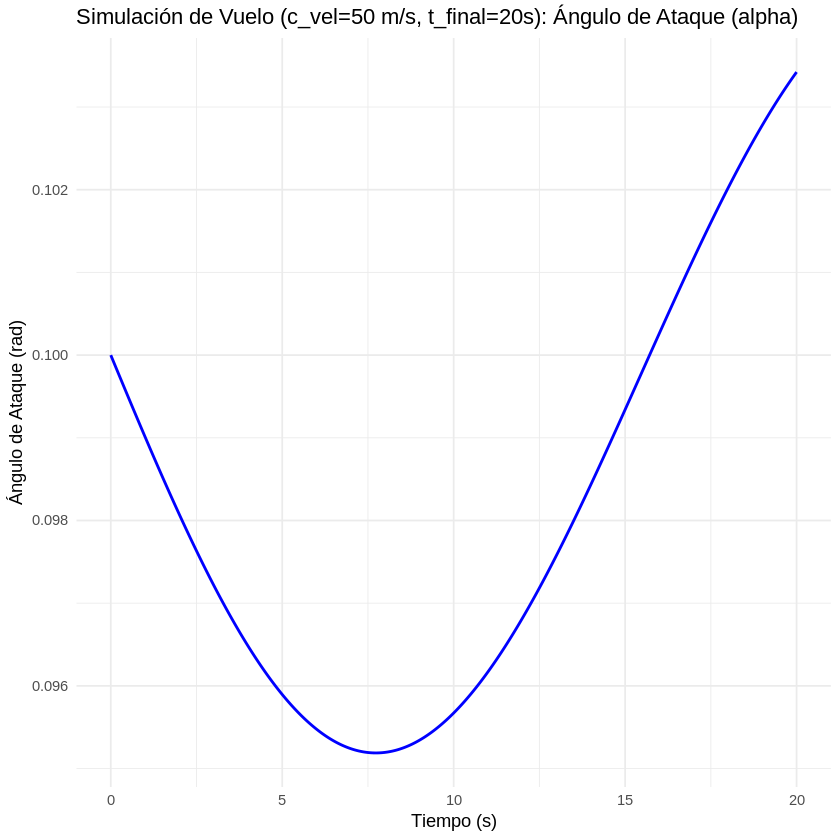

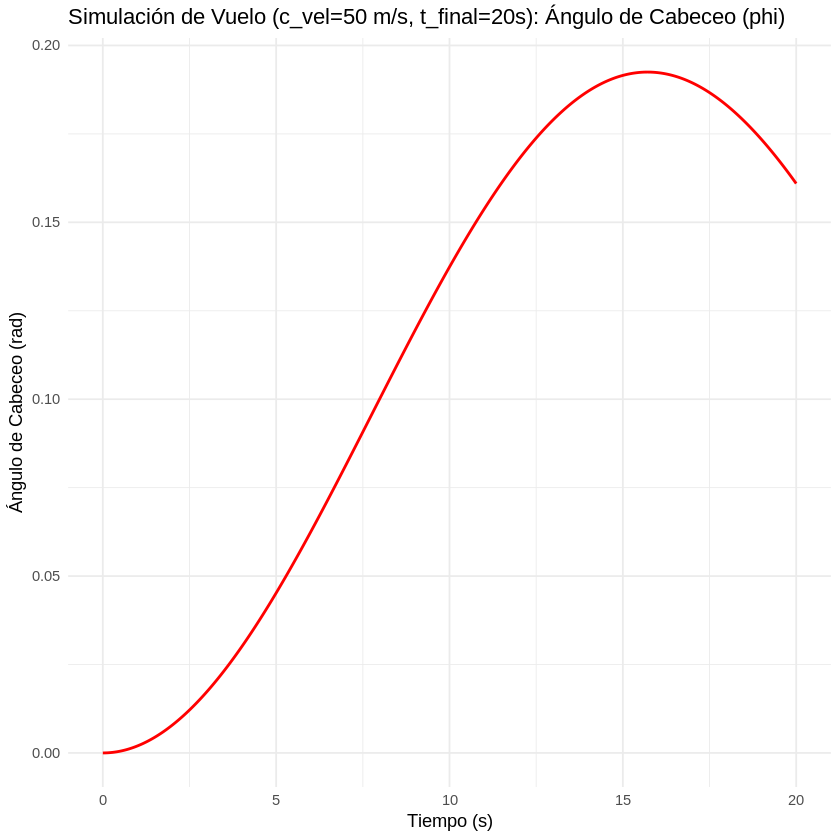

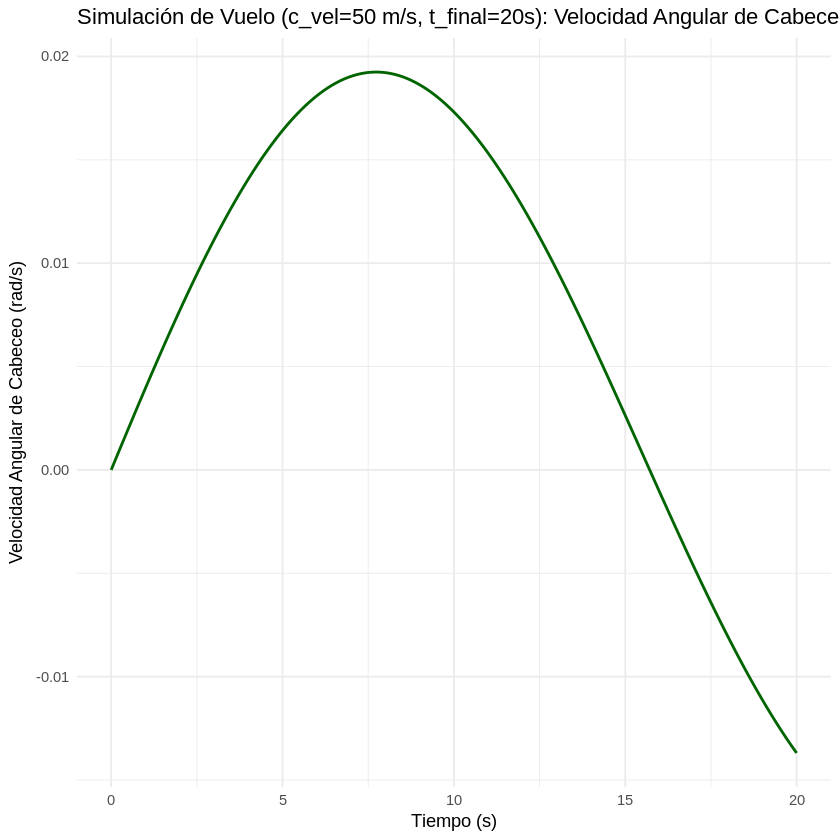

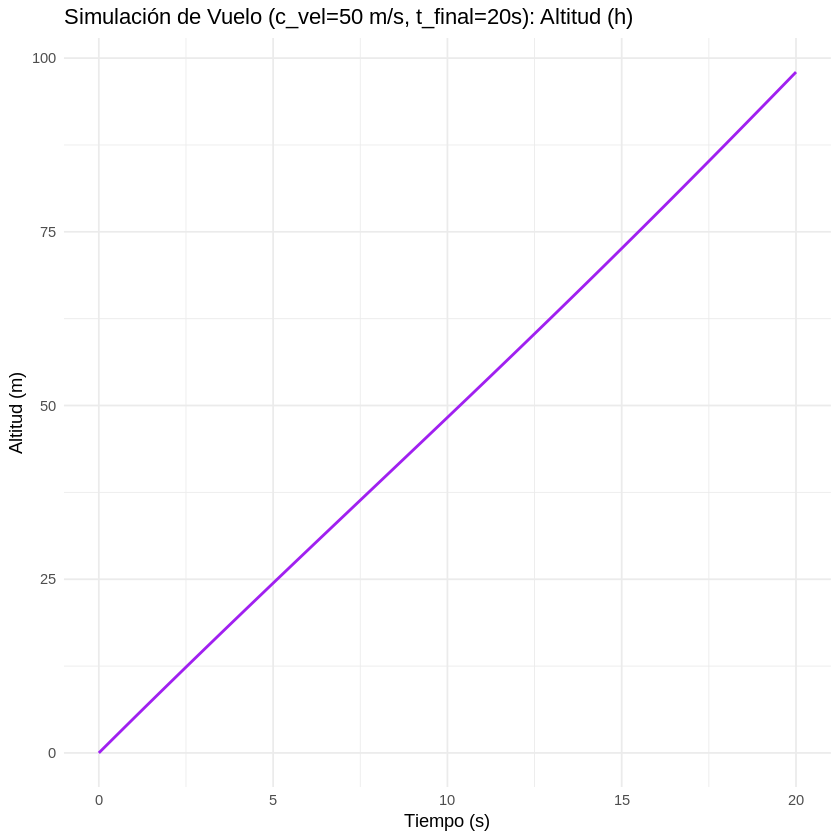

In [ ]:
# @title
library(ggplot2) # Para gráficos avanzados

# --- Parámetros del modelo (Actividad 3 del vuelo del avión) ---
omega <- 0.2    # Frecuencia natural (rad/s)
a <- 0.01       # Coeficiente de amortiguamiento
b <- 2          # Constante de control
c_vel <- 50     # Velocidad de vuelo (m/s) (¡Vuelve a 50 m/s!)

# --- Parámetros de la simulación (Actividad 3 del vuelo del avión) ---
h <- 1e-3                   # Paso de tiempo (s)
t_final <- 20               # Tiempo de simulación (s) (¡Vuelve a 20 segundos!)
t <- seq(0, t_final, by = h) # Vector de tiempo
n_steps <- length(t)       # Número de pasos

# --- Matrices del sistema lineal ---
# A y B dependen de los parámetros actualizados
A <- matrix(c(-a, 0, omega^2, c_vel,     # Columna 1 de la matriz A
              a, 0, -omega^2, 0,        # Columna 2 de la matriz A
              0, 1, 0, 0,              # Columna 3 de la matriz A
              0, 0, 0, 0),             # Columna 4 de la matriz A
            nrow = 4, ncol = 4, byrow = FALSE)

B <- matrix(c(0, 0, omega^2 * b, 0),    # Columna 1 de la matriz B
            nrow = 4, ncol = 1)

#---Autovalores de la matriz A ---
eigenvalues_A <- eigen(A)$values
cat('Autovalores de la matriz A (con c_vel = 50 m/s y t_final = 20 s):\n')
print(eigenvalues_A)

# --- Condición inicial (se mantiene igual) ---
x0 <- c(0.1,    # alpha(0) - Angulo de ataque inicial
        0,      # phi(0)   - Angulo de cabeceo inicial
        0,      # phi_dot(0) - Velocidad angular de cabeceo inicial
        0)      # h(0)     - Altitud inicial

# --- Inicialización de la matriz de estados ---
x <- matrix(0, nrow = 4, ncol = n_steps)
x[, 1] <- x0 # Asignar la condición inicial al primer paso de tiempo

# --- Entrada de control (nula para evaluar el comportamiento inherente) ---
u <- matrix(0, nrow = 1, ncol = n_steps) # Un solo valor de control por paso, todo ceros

# --- Simulación con el método de Euler hacia adelante ---
for (n in 1:(n_steps - 1)) {
    # x(n+1) = x(n) + h * (A * x(n) + B * u(n))
    x[, n + 1] <- x[, n] + h * (A %*% x[, n] + B %*% u[, n])
}

# --- Preparar los datos para graficar con ggplot2 ---
x_df <- as.data.frame(t(x))
colnames(x_df) <- c("alpha", "phi", "phi_dot", "h") # Nombres de las columnas
x_df$Tiempo <- t # Añadir el vector de tiempo al data frame para graficar

# Graficar los resultados de cada variable de estado

# Gráfico de Angulo de ataque (alpha)
plot_alpha <- ggplot(x_df, aes(x = Tiempo, y = alpha)) +
  geom_line(color = "blue", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo (c_vel=50 m/s, t_final=20s): Ángulo de Ataque (alpha)",
    x = "Tiempo (s)",
    y = "Ángulo de Ataque (rad)"
  ) +
  theme_minimal()

# Gráfico de Ángulo de cabeceo (phi)
plot_phi <- ggplot(x_df, aes(x = Tiempo, y = phi)) +
  geom_line(color = "red", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo (c_vel=50 m/s, t_final=20s): Ángulo de Cabeceo (phi)",
    x = "Tiempo (s)",
    y = "Ángulo de Cabeceo (rad)"
  ) +
  theme_minimal()

# Gráfico de Velocidad angular de cabeceo (phi_dot)
plot_phi_dot <- ggplot(x_df, aes(x = Tiempo, y = phi_dot)) +
  geom_line(color = "darkgreen", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo (c_vel=50 m/s, t_final=20s): Velocidad Angular de Cabeceo (phi_dot)",
    x = "Tiempo (s)",
    y = "Velocidad Angular de Cabeceo (rad/s)"
  ) +
  theme_minimal()

# Gráfico de Altitud (h)
plot_h <- ggplot(x_df, aes(x = Tiempo, y = h)) +
  geom_line(color = "purple", linewidth = 0.8) +
  labs(
    title = "Simulación de Vuelo (c_vel=50 m/s, t_final=20s): Altitud (h)",
    x = "Tiempo (s)",
    y = "Altitud (m)"
  ) +
  theme_minimal()

# Imprimir las gráficas
print(plot_alpha)
print(plot_phi)
print(plot_phi_dot)
print(plot_h)

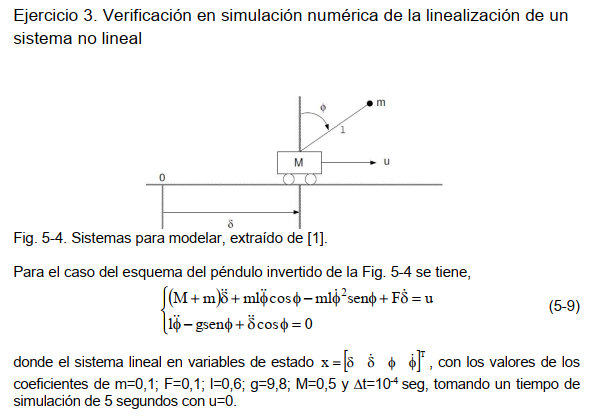

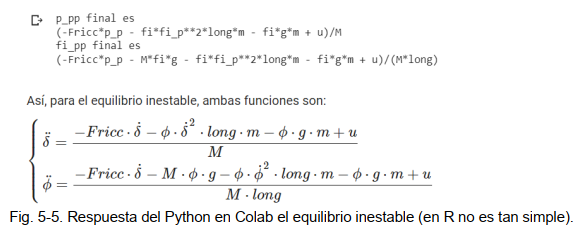

Se pide:
1- Obtener simulaciones del sistema (5-9) en las condiciones iniciales
x0 = (0 0 -0,01 0)T y x0 = (0 0 3,2 0)T , empleando una integración
Euler adecuado a las constantes de tiempo del sistema linealizado (por ejemplo
Dt=10-4). El tiempo de simulación será de 10 segundos en cada caso, con u=0.

In [5]:
# @title
install.packages("patchwork")
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Para el estado estable fi= pi

Iniciando simulación para Equilibrio Estable...
Simulación terminada. Tiempo de cálculo: 2.773408 segundos.


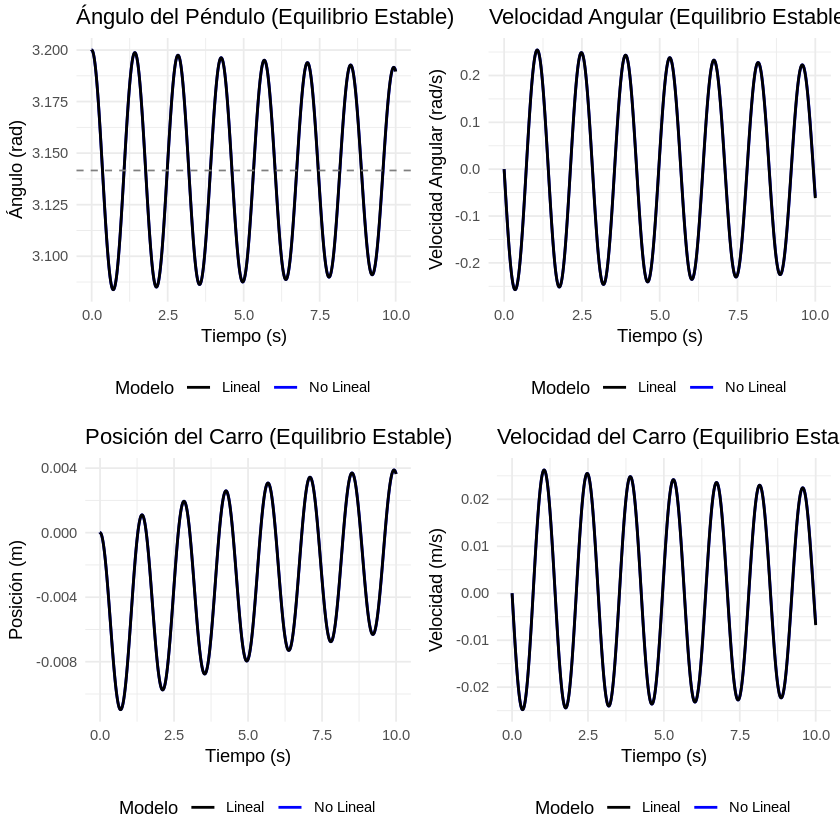

Autovalores para el Equilibrio Estable:Autovalor 1: -0.0166 + 4.4265i
  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)
  - Frecuencia natural de Oscilación (aproximada): 4.43 rad/s
  - Tasa de Amortiguación: 0.02
Autovalor 2: -0.0166 + -4.4265i
  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)
  - Frecuencia natural de Oscilación (aproximada): 4.43 rad/s
  - Tasa de Amortiguación: 0.02
Autovalor 3: -0.1667 + 0.0000i
  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)
  - Tasa de Decaimiento: 0.17
Autovalor 4: 0.0000 + 0.0000i
  - Comportamiento: Constante (punto de equilibrio o linea)
-----------------------------------------


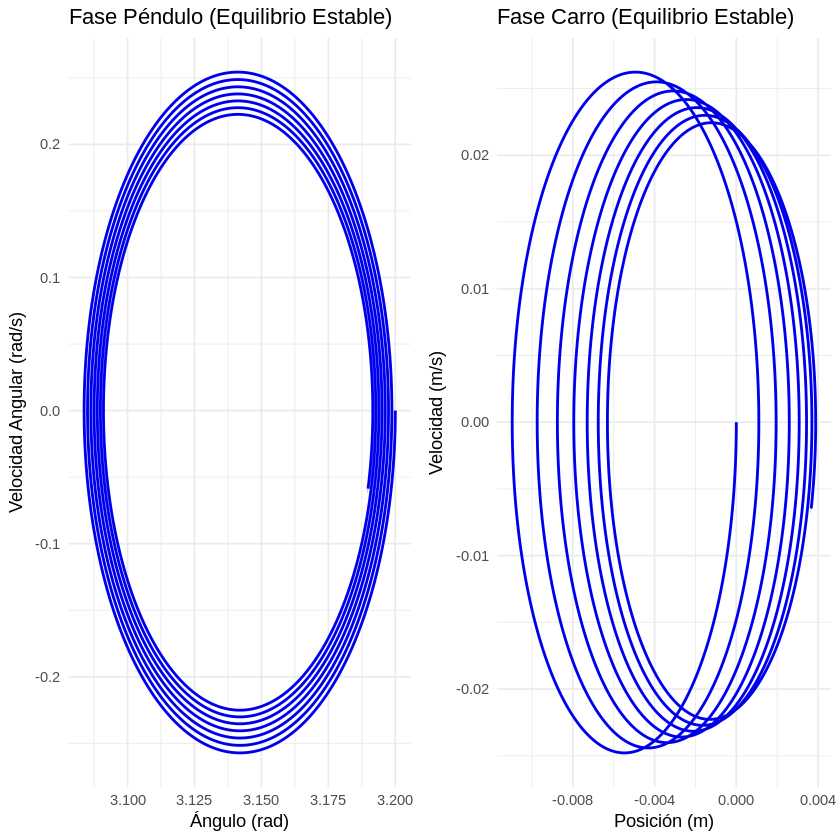

In [6]:
# @title
# Limpiar el entorno de R
rm(list = ls())

# --- Instalación y Carga de Librerías ---
# Instalar gridExtra si no está instalado (solo la primera vez)
if (!requireNamespace("gridExtra", quietly = TRUE)) {
  install.packages("gridExtra")
}
# Cargar librerías
library(ggplot2)
library(gridExtra)

# --- Definición de Parámetros del Sistema ---
m_val <- 0.1       # Masa del péndulo (kg)
Fricc_val <- 0.1    # Coeficiente de fricción del carro (Ns/m)
long_val <- 0.6     # Longitud del péndulo (m)
g_val <- 9.8        # Aceleración de la gravedad (m/s^2)
M_val <- 0.5        # Masa del carro (kg)

# --- Configuración de la Simulación ---
h_val <- 0.0001     # Paso de tiempo (s)
tiempo_final <- 10   # Tiempo final de simulación (s)
num_pasos <- tiempo_final / h_val

# --- Condiciones Iniciales ---
# Modelo No Lineal
alfa <- numeric(num_pasos + 1)
omega <- numeric(num_pasos + 1)
p <- numeric(num_pasos + 1)
p_p <- numeric(num_pasos + 1)
u <- numeric(num_pasos + 1) # Acción de control (u=0 para lazo abierto)

alfa[1] <- 3.2       # Desvío del equilibrio estable (pi rad)
omega[1] <- 0
p[1] <- 0
p_p[1] <- 0
u[1] <- 0

# Modelo Linealizado (en el equilibrio estable: X0_eq = [0, 0, pi, 0]')
alfal <- numeric(num_pasos + 1)
omegal <- numeric(num_pasos + 1)
pl <- numeric(num_pasos + 1)
p_pl <- numeric(num_pasos + 1)

# Estado inicial para el modelo linealizado
X_lineal <- c(p[1], p_p[1], alfa[1], omega[1])
X0_eq_estable <- c(0, 0, pi, 0) # Punto de equilibrio para linealización

# Inicializar los primeros valores para las variables linealizadas
pl[1] <- X_lineal[1]
p_pl[1] <- X_lineal[2]
alfal[1] <- X_lineal[3]
omegal[1] <- X_lineal[4]


# Matriz A del sistema linealizado en el equilibrio estable (phi = pi)
Mat_A_estable <- matrix(c(
  0, 1, 0, 0,
  0, -Fricc_val / M_val, -m_val * g_val / M_val, 0,
  0, 0, 0, 1,
  0, -Fricc_val / (long_val * M_val), -g_val * (m_val + M_val) / (long_val * M_val), 0
), nrow = 4, ncol = 4, byrow = TRUE)

# Matriz B del sistema linealizado
Mat_B <- matrix(c(0, 1/M_val, 0, 1/(long_val*M_val)), ncol = 1)

# --- Bucle de Simulación ---
cat("Iniciando simulación para Equilibrio Estable...\n")
tiempo_inicio <- Sys.time()

for (i in 1:num_pasos) {
  # --- Variables del Sistema No Lineal ---
  current_alfa <- alfa[i]
  current_omega <- omega[i]
  current_p_p <- p_p[i]
  current_u <- u[i]

  # Calcular cos y sin del ángulo actual para las ecuaciones no lineales
  cos_alfa <- cos(current_alfa)
  sin_alfa <- sin(current_alfa)

  # **CORRECCIÓN CLAVE: Resolver p_pp y tita_pp simultáneamente**
  # Matriz A_coupled_NL para el sistema de ecuaciones de aceleraciones
  A_coupled_NL <- matrix(c(
    (M_val + m_val), (m_val * long_val * cos_alfa),
    (m_val * long_val * cos_alfa), (m_val * long_val^2)
  ), nrow = 2, ncol = 2, byrow = TRUE)

  # Vector B_coupled_NL para el sistema de ecuaciones de aceleraciones
  B_coupled_NL <- c(
    (current_u - Fricc_val * current_p_p + m_val * long_val * current_omega^2 * sin_alfa),
    (m_val * g_val * long_val * sin_alfa)
  )

  # Resolver el sistema para obtener las aceleraciones (p_pp y tita_pp)
  accelerations_NL <- tryCatch({
    solve(A_coupled_NL, B_coupled_NL)
  }, error = function(e) {
    warning("Error al resolver el sistema de aceleraciones en el paso ", i, ": ", e$message)
    c(0, 0) # Devolver 0 para evitar que la simulación se detenga
  })

  p_pp_val <- accelerations_NL[1]
  tita_pp_val <- accelerations_NL[2]

  # Actualizar estados del modelo no lineal (Euler explícito)
  p_p[i+1] <- current_p_p + h_val * p_pp_val
  p[i+1] <- p[i] + h_val * current_p_p
  omega[i+1] <- current_omega + h_val * tita_pp_val
  alfa[i+1] <- current_alfa + h_val * current_omega

  # --- Sistema Linealizado ---
  # El modelo linealizado se calcula a partir de la desviación del equilibrio (X_lineal - X0_eq_estable)
  derivadas_lineal <- Mat_A_estable %*% (X_lineal - X0_eq_estable) + Mat_B %*% u[i]
  X_lineal <- X_lineal + h_val * derivadas_lineal

  # Almacenar estados del modelo linealizado
  pl[i+1] <- X_lineal[1]
  p_pl[i+1] <- X_lineal[2]
  alfal[i+1] <- X_lineal[3]
  omegal[i+1] <- X_lineal[4]
}
tiempo_fin <- Sys.time()
cat("Simulación terminada. Tiempo de cálculo:", difftime(tiempo_fin, tiempo_inicio, units = "secs"), "segundos.\n")

# --- Preparación para Graficar ---
tiempo <- seq(0, tiempo_final, by = h_val)
color_nl <- "blue" # Color para las curvas no lineales
color_l <- "black" # Color para las curvas lineales

# Crear un dataframe para ggplot2
df_estable <- data.frame(
  Tiempo = tiempo,
  Alfa_NL = alfa,
  Omega_NL = omega,
  P_NL = p,
  Pp_NL = p_p,
  Alfa_L = alfal,
  Omega_L = omegal,
  P_L = pl,
  Pp_L = p_pl
)

# Graficos de tiempo
plot_alfa_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = Alfa_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Alfa_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  geom_hline(yintercept = pi, linetype = "dashed", color = "gray50") + # Línea del equilibrio estable
  labs(title = "Ángulo del Péndulo (Equilibrio Estable)", y = "Ángulo (rad)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

plot_omega_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = Omega_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Omega_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Velocidad Angular (Equilibrio Estable)", y = "Velocidad Angular (rad/s)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

plot_p_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = P_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = P_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Posición del Carro (Equilibrio Estable)", y = "Posición (m)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

plot_pp_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = Pp_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Pp_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Velocidad del Carro (Equilibrio Estable)", y = "Velocidad (m/s)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

# Gráficos de Fase
plot_fase_alfa_omega_estable <- ggplot(df_estable, aes(x = Alfa_NL, y = Omega_NL)) +
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) +
  geom_path(aes(x = Alfa_L, y = Omega_L, color = "Lineal"), linewidth = 0.05, linetype = "solid") +
  labs(title = "Fase Péndulo (Equilibrio Estable)", x = "Ángulo (rad)", y = "Velocidad Angular (rad/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

plot_fase_p_pp_estable <- ggplot(df_estable, aes(x = P_NL, y = Pp_NL)) +
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) +
  geom_path(aes(x = P_L, y = Pp_L, color = "Lineal"), linewidth = 0.05, linetype = "solid") +
  labs(title = "Fase Carro (Equilibrio Estable)", x = "Posición (m)", y = "Velocidad (m/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# Mostrar los gráficos
grid.arrange(plot_alfa_estable, plot_omega_estable, plot_p_estable, plot_pp_estable, ncol = 2)
grid.arrange(plot_fase_alfa_omega_estable, plot_fase_p_pp_estable, ncol = 2)

# Guardar los gráficos si es necesario
# ggsave("equilibrio_estable_tiempo.png", plot = grid.arrange(plot_alfa_estable, plot_omega_estable, plot_p_estable, plot_pp_estable, ncol = 2), width = 10, height = 8)
# ggsave("equilibrio_estable_fase.png", plot = grid.arrange(plot_fase_alfa_omega_estable, plot_fase_p_pp_estable, ncol = 2), width = 10, height = 5)

# --- Autovalores ---
# Calcular los autovalores de la matriz A del sistema linealizado
eigen_results_estable <- eigen(Mat_A_estable)
eigenvalues_estable <- eigen_results_estable$values

cat("Autovalores para el Equilibrio Estable:")
#print(eigenvalues_estable)

# Función para interpretar los autovalores
interpret_eigenvalues <- function(eigenvalues) {
    for (i in seq_along(eigenvalues)) {
    val <- eigenvalues[i]
    real_part <- Re(val)
    imag_part <- Im(val)

    cat(sprintf("Autovalor %d: %.4f + %.4fi\n", i, real_part, imag_part))

    # Comportamiento basado en la parte real e imaginaria
    if (abs(imag_part) > 1e-9) { # Si hay parte imaginaria significativa (oscilación)
      if (real_part < -1e-9) {
        cat("  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)\n")
        cat(sprintf("  - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n", abs(imag_part)))
        cat(sprintf("  - Tasa de Amortiguación: %.2f\n", -real_part))
      } else if (real_part > 1e-9) {
        cat("  - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!\n")
      } else {
        cat("  - Comportamiento: Oscilación Sostenida (Órbita)\n")
      }
    } else { # Si es puramente real (no oscila)
      if (real_part < -1e-9) {
        cat("  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)\n")
        cat(sprintf("  - Tasa de Decaimiento: %.2f\n", -real_part))
      } else if (real_part > 1e-9) {
        cat("  - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!\n")
      } else {
        cat("  - Comportamiento: Constante (punto de equilibrio o linea)\n")
      }
    }
  }
  cat("-----------------------------------------\n")
}

interpret_eigenvalues(eigenvalues_estable)


Analisis de las respuestas:

El comportamiento oscilatorio amortiguado del sistema coincide con la presencia de los autovalores complejos 1 y 2 y con su parte real negativa.

El Autovalor 3 real negativo aporta a la amortiguacion.

El avance de la posicion del carro queda explicada por el autovalor 4.

Angulo vs. tiempo: Se observa que el angulo del pendulo oscila de manera amortiguada, alrededor del punto de equilibrio estable.

Velocidad angular vs tiempo: la velocidad tambien oscila de manera amortiguada.

Posicion carro vs tiempo: El carro se mueve de atras hacia adelante (oscila) y se desplaza hacia la derecha.

Velocidad carro vs tiempo: La velocidad del carro oscila de manera amortiguada.

Velocidad angular vs angulo: Se observa una espiral que se acerca al punto de equilibrio del pendulo (pi, 0). Explicado por la presencia de autovalores complejos con parte real negativa.

Velocidad del carro vs Posicion del carro: Se observa una espiral que se acerca a la posicion final del carro (x, 0). Explicado por la presencia de autovalores complejos con parte real negativa.

El modelo lineal coincide con el modelo no lineal para el tiempo de simulacion debido a que se aplica para pequeños angulos alrededor del equilibrio estable.

Para el estado inestable fi=0


--- Verificación de Valores de Alfa ---
Valores a t = 0.5000 s (índice 5001):
  Alfa_L (Lineal): -0.046056 rad
  Alfa_NL (No Lineal): -0.046048 rad
----------------------------------------


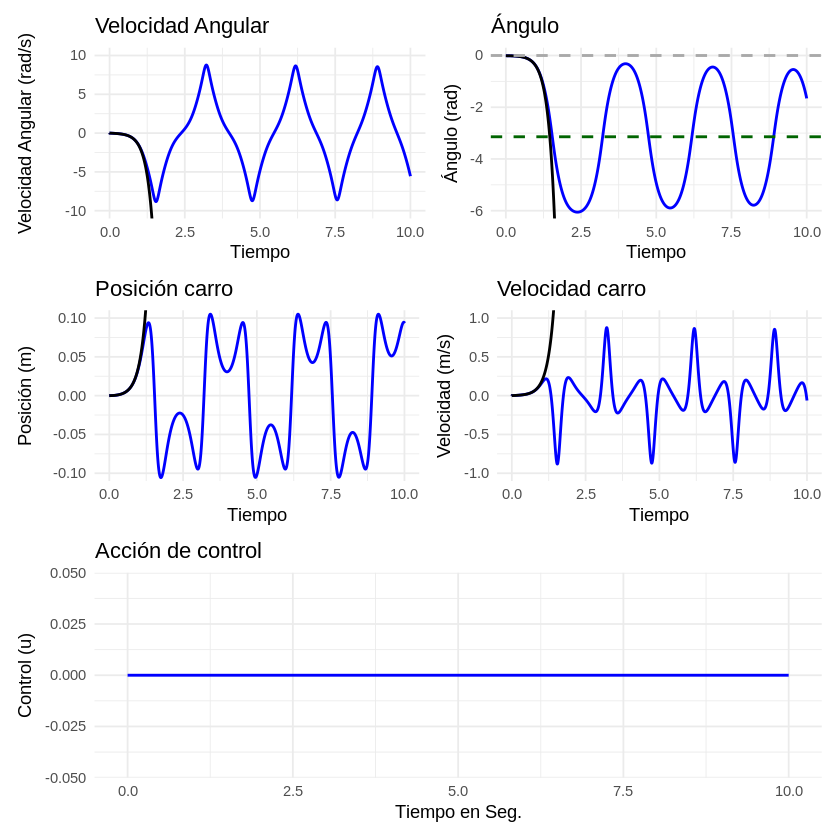


Tiempo de cálculo = 9.340443 segundos

--- Análisis de Autovalores para el Equilibrio Inestable ---

Autovalor 1: -4.4445 +0.0000i
  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)
  - Tasa de Decaimiento: 4.44
Autovalor 2: 4.4112 +0.0000i
  - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!
  - Tasa de Crecimiento: 4.41
Autovalor 3: -0.1666 +0.0000i
  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)
  - Tasa de Decaimiento: 0.17
Autovalor 4: 0.0000 +0.0000i
  - Comportamiento: Constante (punto de equilibrio o linea)

--- Verificación de Valores Detallada (Alfa) ---
Valores a t = 0.0000 s:
  Alfa_L (Lineal): -0.010000 rad
  Alfa_NL (No Lineal): -0.010000 rad
Valores a t = 0.5000 s (índice 5001):
  Alfa_L (Lineal): -0.046056 rad
  Alfa_NL (No Lineal): -0.046048 rad
Valores a t = 1.0000 s (índice 10001):
  Alfa_L (Lineal): -0.412922 rad
  Alfa_NL (No Lineal): -0.408216 rad
Valores a t = 1.5000 s (índice 15001):
  Alfa_L (Lineal

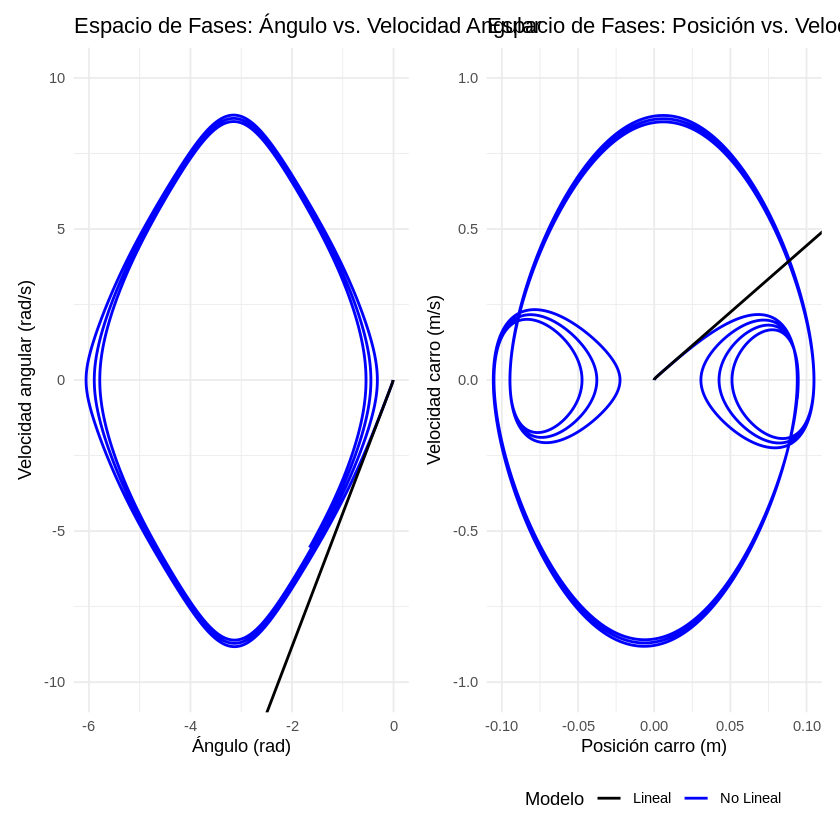

In [8]:
# @title
library(ggplot2)
library(patchwork)
library(tidyr) # Necesario para pivot_longer

# --- Parámetros ---
m_val <- 0.1      # Masa del péndulo (kg)
Fricc_val <- 0.1   # Coeficiente de fricción
long_val <- 0.6  # Longitud del péndulo (m)
g_val <- 9.8     # Aceleración de la gravedad (m/s^2)
M_val <- 0.5     # Masa del carro (kg)
h_val <- 0.0001  # Paso de tiempo (s)
tiempo_final <- 10 # Tiempo total de simulación (s) - ¡MODIFICADO A 10 SEGUNDOS!
n_steps <- as.integer(tiempo_final / h_val) # Número de pasos

# --- Inicialización de vectores ---
omega <- numeric(n_steps + 1) # Velocidad angular del péndulo
alfa <- numeric(n_steps + 1)  # Ángulo del péndulo
p <- numeric(n_steps + 1)     # Posición del carro
p_p <- numeric(n_steps + 1)   # Velocidad del carro
u <- numeric(n_steps + 1)     # Acción de control (entrada), inicializada a ceros por defecto

# --- Condiciones iniciales (equilibrio inestable fi ≈ 0) ---
alfa[1] <- -0.01 # Pequeño desvío desde fi = 0
omega[1] <- 0
p[1] <- 0
p_p[1] <- 0
color_nl <- "blue" # Color para las curvas no lineales en los gráficos
color_l <- "black" # Color para las curvas lineales (asumido si no está definido)


# --- Matrices del sistema linealizado (equilibrio inestable fi ≈ 0) ---
Mat_A <- matrix(c(
  0, 1, 0, 0,
  0, -Fricc_val / M_val, -m_val * g_val / M_val, 0,
  0, 0, 0, 1,
  0, Fricc_val / (long_val * M_val), (M_val + m_val) * g_val / (long_val * M_val), 0
), nrow = 4, ncol = 4, byrow = TRUE)

Mat_B <- matrix(c(0, 1 / M_val, 0, 1 / (long_val * M_val)), nrow = 4, ncol = 1)

# --- Punto de equilibrio para la linealización ---
X0_eq <- c(0, 0, 0, 0)

# --- Inicialización resultados del sistema linealizado ---
x_linear <- c(p[1], p_p[1], alfa[1], omega[1]) # Estado inicial del sistema linealizado

pl <- numeric(n_steps + 1)    # Posición carro linealizada
p_pl <- numeric(n_steps + 1)  # Velocidad carro linealizada
alfal <- numeric(n_steps + 1) # Ángulo linealizado
omegal <- numeric(n_steps + 1) # Velocidad angular linealizada

# --- Simulación ---
start_time_r <- Sys.time() # Iniciar el temporizador

for (i in 1:n_steps) {
  # --- Simulación No Lineal ---
  sin_phi <- sin(alfa[i])
  cos_phi <- cos(alfa[i])

  A_nl <- matrix(c(
    1, m_val * long_val * cos_phi / (M_val + m_val),
    cos_phi / long_val, 1
  ), nrow = 2, ncol = 2, byrow = TRUE)

  b_nl <- c(
    (u[i] + m_val * long_val * omega[i]^2 * sin_phi - Fricc_val * p_p[i]) / (M_val + m_val),
    g_val * sin_phi / long_val
  )

  sol_nl <- tryCatch({
    solve(A_nl, b_nl)
  }, error = function(e) {
    c(0, 0) # Devuelve ceros si hay un error
  })

  p_pp_val <- sol_nl[1]
  tita_pp_val <- sol_nl[2] # Aceleración angular

  # Integración de Euler para el sistema No Lineal
  p_p[i + 1] <- p_p[i] + h_val * p_pp_val
  p[i + 1] <- p[i] + h_val * p_p[i]
  omega[i + 1] <- omega[i] + h_val * tita_pp_val
  alfa[i + 1] <- alfa[i] + h_val * omega[i]

  # --- Simulación Lineal ---
  pl[i] <- x_linear[1]
  p_pl[i] <- x_linear[2]
  alfal[i] <- x_linear[3]
  omegal[i] <- x_linear[4]

  xp_linear <- Mat_A %*% (x_linear - X0_eq) + Mat_B %*% u[i]
  x_linear <- x_linear + h_val * xp_linear
}

pl[n_steps + 1] <- x_linear[1]
p_pl[n_steps + 1] <- x_linear[2]
alfal[n_steps + 1] <- x_linear[3]
omegal[n_steps + 1] <- x_linear[4]

# --- Vector de tiempo para los gráficos ---
t_vector <- seq(0, tiempo_final, by = h_val)

# --- Preparar datos para ggplot2 ---
data_plot <- data.frame(
  Tiempo = t_vector,
  Omega_NL = omega,
  Alfa_NL = alfa,
  P_NL = p,
  Pp_NL = p_p,
  U = u,
  Omega_L = omegal,
  Alfa_L = alfal,
  P_L = pl,
  Pp_L = p_pl
)

# --- Verificación de Valores (Mantenido para depuración si es necesario) ---
cat("\n--- Verificación de Valores de Alfa ---\n")
idx_0_5s <- which.min(abs(t_vector - 0.5))
cat(sprintf("Valores a t = %.4f s (índice %d):\n", t_vector[idx_0_5s], idx_0_5s))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[idx_0_5s]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[idx_0_5s]))
cat("----------------------------------------\n")

# --- Gráficos con ggplot2 y patchwork ---

# Definir límites de Y específicos para una mejor visualización de la "caída"
y_lim_alfa_min <- -6.0 # Extendido a -6 radianes
y_lim_alfa_max <- 0  # Un poco por encima de 0

y_lim_omega_min <- -10.0 # Ajustado a -10 a 10
y_lim_omega_max <- 10.0

y_lim_p_min <- -0.1 # Ajustado para posición del carro
y_lim_p_max <- 0.1

y_lim_pp_min <- -1.0 # Ajustado para velocidad del carro
y_lim_pp_max <- 1.0


# 1. Plot de Velocidad Angular (Omega)
plot_omega <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Omega_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Omega_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  coord_cartesian(ylim = c(y_lim_omega_min, y_lim_omega_max)) + # ZOOM Y
  labs(title = "Velocidad Angular", y = "Velocidad Angular (rad/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 2. Plot de Ángulo (Alfa)
plot_alfa <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Alfa_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Alfa_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  geom_hline(yintercept = 0, color = "darkgrey", linewidth = 0.8, linetype = "dashed") + # Línea de equilibrio en 0
  geom_hline(yintercept = -pi, color = "darkgreen", linewidth = 0.8, linetype = "dashed") + # Línea de equilibrio en -pi
  coord_cartesian(ylim = c(y_lim_alfa_min, y_lim_alfa_max)) + # ZOOM Y
  labs(title = "Ángulo", y = "Ángulo (rad)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 3. Plot de Posición del Carro (p)
plot_p <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = P_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = P_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  coord_cartesian(ylim = c(y_lim_p_min, y_lim_p_max)) + # ZOOM Y
  labs(title = "Posición carro", y = "Posición (m)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 4. Plot de Velocidad del Carro (p_p)
plot_pp <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Pp_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Pp_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  coord_cartesian(ylim = c(y_lim_pp_min, y_lim_pp_max)) + # ZOOM Y
  labs(title = "Velocidad carro", y = "Velocidad (m/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 5. Plot de Acción de Control (u)
plot_u <- ggplot(data_plot, aes(x = Tiempo, y = U)) +
  geom_line(color = color_nl, linewidth = 0.8) +
  labs(title = "Acción de control", y = "Control (u)", x = "Tiempo en Seg.") +
  theme_minimal()

# --- Combinar los plots para la Figura 1 usando patchwork ---
fig1_combined <- (plot_omega | plot_alfa) / (plot_p | plot_pp) / plot_u +
  plot_layout(heights = c(1, 1, 1.2))

print(fig1_combined)

# --- Figura 2: Gráficos de Fase ---

# **NUEVO: Submuestreo de datos para los gráficos de fase**
subsample_factor <- 20 # Tomar 1 de cada 20 puntos
data_plot_subsampled <- data_plot[seq(1, nrow(data_plot), by = subsample_factor), ]

# 1. Espacio de Fases: Ángulo vs. Velocidad Angular (con linewidth muy pequeño y submuestreo)
plot_fase_alfa_omega <- ggplot(data_plot_subsampled, aes(x = Alfa_NL, y = Omega_NL)) + # Usar datos submuestreados
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) + # Volvemos a 0.05, con menos puntos no es necesario 0.01
  geom_path(aes(x = Alfa_L, y = Omega_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") + # Usar datos submuestreados
  labs(x = "Ángulo (rad)", y = "Velocidad angular (rad/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  coord_cartesian(xlim = c(y_lim_alfa_min, y_lim_alfa_max), ylim = c(y_lim_omega_min, y_lim_omega_max)) +
  theme_minimal() +
  ggtitle("Espacio de Fases: Ángulo vs. Velocidad Angular") + theme(legend.position = "none")

# 2. Espacio de Fases: Posición del Carro vs. Velocidad del Carro (con linewidth muy pequeño y submuestreo)
plot_fase_p_pp <- ggplot(data_plot_subsampled, aes(x = P_NL, y = Pp_NL)) + # Usar datos submuestreados
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) + # Volvemos a 0.05, con menos puntos no es necesario 0.01
  geom_path(aes(x = P_L, y = Pp_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") + # Usar datos submuestreados
  labs(x = "Posición carro (m)", y = "Velocidad carro (m/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  coord_cartesian(xlim = c(y_lim_p_min, y_lim_p_max), ylim = c(y_lim_pp_min, y_lim_pp_max)) +
  theme_minimal() +
  ggtitle("Espacio de Fases: Posición vs. Velocidad Carro") + theme(legend.position = "bottom")

# Combinar los plots para la Figura 2
fig2_combined <- plot_fase_alfa_omega | plot_fase_p_pp

print(fig2_combined)

# --- Guardar variables ---
# Se recomienda guardar en formato .RData para uso posterior en R
# save(alfa, omega, p, p_p, u, pl, p_pl, alfal, omegal, t_vector, file = "Datos_Controlador_VI.RData")

# --- Tiempo de cómputo ---
end_time_r <- Sys.time()
TCalculo <- as.numeric(difftime(end_time_r, start_time_r, units = "secs"))
cat("\nTiempo de cálculo =", TCalculo, "segundos\n")

# --- Análisis de Autovalores ---
# Calcular los autovalores de la matriz A del sistema linealizado
eigen_results_inestable <- eigen(Mat_A)
eigenvalues_inestable <- eigen_results_inestable$values

# Función para interpretar los autovalores
interpret_eigenvalues <- function(eigenvalues) {
  for (i in 1:length(eigenvalues)) {
    lambda <- eigenvalues[i]
    real_part <- Re(lambda)
    imag_part <- Im(lambda)

    cat(sprintf("Autovalor %d: %.4f %+.4fi\n", i, real_part, imag_part))

    if (abs(real_part) < 1e-5 && abs(imag_part) < 1e-5) {
      cat("  - Comportamiento: Constante (punto de equilibrio o linea)\n")
    } else if (abs(real_part) < 1e-5) {
      cat("  - Comportamiento: Oscilación Pura (Centro)\n")
      cat(sprintf("  - Frecuencia de Oscilación: %.2f rad/s\n", abs(imag_part)))
    } else if (real_part < 0) {
      if (abs(imag_part) < 1e-5) {
        cat("  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)\n")
        cat(sprintf("  - Tasa de Decaimiento: %.2f\n", abs(real_part)))
      } else {
        cat("  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)\n")
        cat(sprintf("  - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n", abs(imag_part)))
        cat(sprintf("  - Tasa de Amortiguación: %.2f\n", abs(real_part)))
      }
    } else {
      if (abs(imag_part) < 1e-5) {
        cat("  - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!\n")
        cat(sprintf("  - Tasa de Crecimiento: %.2f\n", real_part))
      } else {
        cat("  - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!\n")
        cat(sprintf("  - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n", abs(imag_part)))
        cat(sprintf("  - Tasa de Crecimiento: %.2f\n", real_part))
      }
    }
  }
}

cat("\n--- Análisis de Autovalores para el Equilibrio Inestable ---\n")
cat("\n")
interpret_eigenvalues(eigenvalues_inestable)
# --- Verificación de Valores ADICIONALES (para ver la divergencia inicial) ---
cat("\n--- Verificación de Valores Detallada (Alfa) ---\n")

# Valores a t = 0.00s
cat(sprintf("Valores a t = 0.0000 s:\n"))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[1]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[1]))

# Valores a t = 0.05s
idx_0_05s <- which.min(abs(t_vector - 0.5))
cat(sprintf("Valores a t = %.4f s (índice %d):\n", t_vector[idx_0_05s], idx_0_05s))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[idx_0_05s]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[idx_0_05s]))

# Valores a t = 0.10s
idx_0_10s <- which.min(abs(t_vector - 1.00))
cat(sprintf("Valores a t = %.4f s (índice %d):\n", t_vector[idx_0_10s], idx_0_10s))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[idx_0_10s]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[idx_0_10s]))

# Valores a t = 0.20s
idx_0_20s <- which.min(abs(t_vector - 1.50))
cat(sprintf("Valores a t = %.4f s (índice %d):\n", t_vector[idx_0_20s], idx_0_20s))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[idx_0_20s]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[idx_0_20s]))

cat("----------------------------------------\n")

Analisis de las respuestas:
Se observa la coincidencia de los modelos lineal y no lineal para valores pequeños del angulo del pendulo, cercanos a 0. Esto esta de acuerdo con el modelo lineal solo valido para pequeños àngulos.

El sistema, representado por el modelo no lineal, muestra un comportamiento oscilatorio amortiguado para la posicion del pendulo, la velocidad, la posicion del carro y su velocidad.


Las simulaciones para la forma lineal y para la forma no lineal coinciden hasta 1 s aproximadamente. Para mayores valores de tiempo el modelo lineal no representa al sistema.






2- Modificar la masa m al doble y repetir la operación.

Para el estado estable fi=pi

Iniciando simulación para Equilibrio Estable...
Simulación terminada. Tiempo de cálculo: 3.056014 segundos.


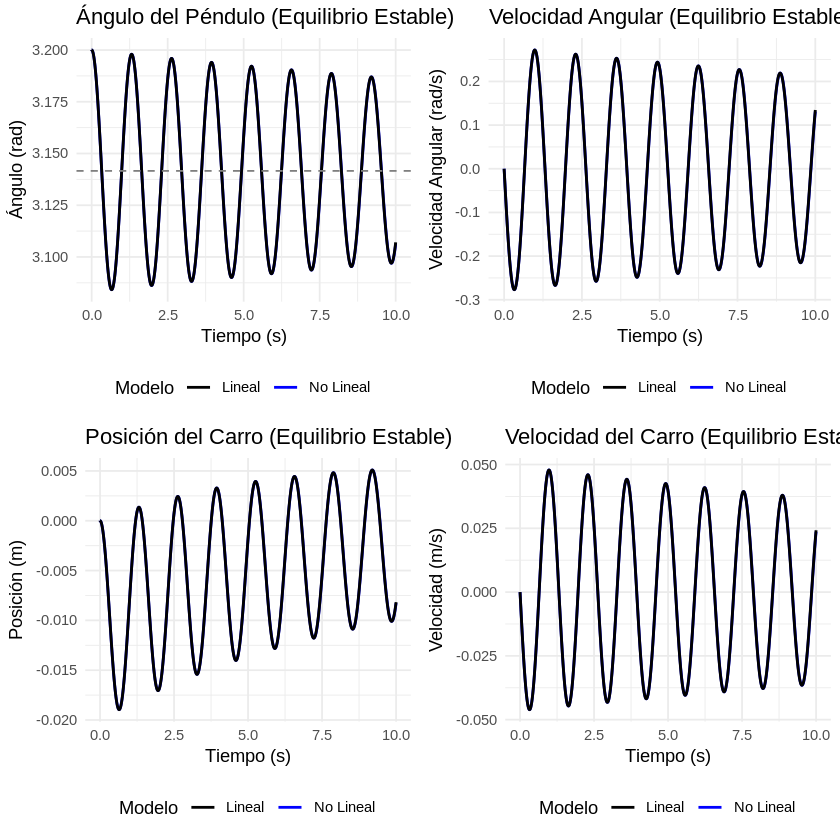

Autovalores para el Equilibrio Estable:Autovalor 1: -0.0285 + 4.7810i
  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)
  - Frecuencia natural de Oscilación (aproximada): 4.78 rad/s
  - Tasa de Amortiguación: 0.03
Autovalor 2: -0.0285 + -4.7810i
  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)
  - Frecuencia natural de Oscilación (aproximada): 4.78 rad/s
  - Tasa de Amortiguación: 0.03
Autovalor 3: -0.1429 + 0.0000i
  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)
  - Tasa de Decaimiento: 0.14
Autovalor 4: 0.0000 + 0.0000i
  - Comportamiento: Constante (punto de equilibrio o linea)
-----------------------------------------


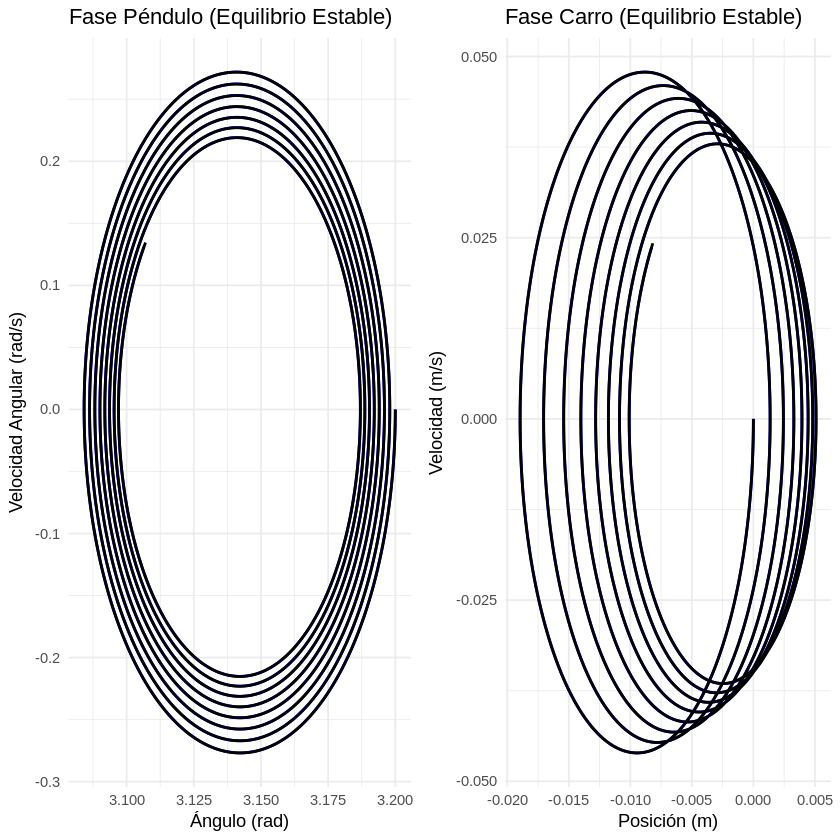

In [ ]:
# @title
# Limpiar el entorno de R
rm(list = ls())

# --- Instalación y Carga de Librerías ---
# Instalar gridExtra si no está instalado (solo la primera vez)
if (!requireNamespace("gridExtra", quietly = TRUE)) {
  install.packages("gridExtra")
}
# Cargar librerías
library(ggplot2)
library(gridExtra)

# --- Definición de Parámetros del Sistema ---
m_val <- 0.2       # Masa del péndulo (kg) - ACTUALIZADO
Fricc_val <- 0.1    # Coeficiente de fricción del carro (Ns/m)
long_val <- 0.6     # Longitud del péndulo (m) - ACTUALIZADO
g_val <- 9.8        # Aceleración de la gravedad (m/s^2)
M_val <- 0.5        # Masa del carro (kg)

# --- Configuración de la Simulación ---
h_val <- 0.0001     # Paso de tiempo (s) - ACTUALIZADO
tiempo_final <- 10   # Tiempo final de simulación (s)
num_pasos <- tiempo_final / h_val

# --- Condiciones Iniciales ---
# Modelo No Lineal
alfa <- numeric(num_pasos + 1)
omega <- numeric(num_pasos + 1)
p <- numeric(num_pasos + 1)
p_p <- numeric(num_pasos + 1)
u <- numeric(num_pasos + 1) # Acción de control (u=0 para lazo abierto)

alfa[1] <- 3.2       # Desvío del equilibrio estable (pi rad)
omega[1] <- 0
p[1] <- 0
p_p[1] <- 0
u[1] <- 0

# Modelo Linealizado (en el equilibrio estable: X0_eq = [0, 0, pi, 0]')
alfal <- numeric(num_pasos + 1)
omegal <- numeric(num_pasos + 1)
pl <- numeric(num_pasos + 1)
p_pl <- numeric(num_pasos + 1)

# Estado inicial para el modelo linealizado
X_lineal <- c(p[1], p_p[1], alfa[1], omega[1])
X0_eq_estable <- c(0, 0, pi, 0) # Punto de equilibrio para linealización

# ¡¡¡CORRECCIÓN AQUÍ!!! Inicializar los primeros valores para las variables linealizadas
pl[1] <- X_lineal[1]
p_pl[1] <- X_lineal[2]
alfal[1] <- X_lineal[3]
omegal[1] <- X_lineal[4]


# Matriz A del sistema linealizado en el equilibrio estable (phi = pi)
Mat_A_estable <- matrix(c(
  0, 1, 0, 0,
  0, -Fricc_val / M_val, -m_val * g_val / M_val, 0,
  0, 0, 0, 1,
  0, -Fricc_val / (long_val * M_val), -g_val * (m_val + M_val) / (long_val * M_val), 0
), nrow = 4, ncol = 4, byrow = TRUE)

# Matriz B del sistema linealizado
Mat_B <- matrix(c(0, 1/M_val, 0, 1/(long_val*M_val)), ncol = 1)

# --- Bucle de Simulación ---
cat("Iniciando simulación para Equilibrio Estable...\n")
tiempo_inicio <- Sys.time()

for (i in 1:num_pasos) {
  # --- Variables del Sistema No Lineal ---
  current_alfa <- alfa[i]
  current_omega <- omega[i]
  current_p_p <- p_p[i]
  current_u <- u[i]

  # Calcular cos y sin del ángulo actual para las ecuaciones no lineales
  cos_alfa <- cos(current_alfa)
  sin_alfa <- sin(current_alfa)

  # **CORRECCIÓN CLAVE: Resolver p_pp y tita_pp simultáneamente**
  # Matriz A_coupled_NL para el sistema de ecuaciones de aceleraciones
  A_coupled_NL <- matrix(c(
    (M_val + m_val), (m_val * long_val * cos_alfa),
    (m_val * long_val * cos_alfa), (m_val * long_val^2)
  ), nrow = 2, ncol = 2, byrow = TRUE)

  # Vector B_coupled_NL para el sistema de ecuaciones de aceleraciones
  B_coupled_NL <- c(
    (current_u - Fricc_val * current_p_p + m_val * long_val * current_omega^2 * sin_alfa),
    (m_val * g_val * long_val * sin_alfa)
  )

  # Resolver el sistema para obtener las aceleraciones (p_pp y tita_pp)
  accelerations_NL <- tryCatch({
    solve(A_coupled_NL, B_coupled_NL)
  }, error = function(e) {
    warning("Error al resolver el sistema de aceleraciones en el paso ", i, ": ", e$message)
    c(0, 0) # Devolver 0 para evitar que la simulación se detenga
  })

  p_pp_val <- accelerations_NL[1]
  tita_pp_val <- accelerations_NL[2]

  # Actualizar estados del modelo no lineal (Euler explícito)
  p_p[i+1] <- current_p_p + h_val * p_pp_val
  p[i+1] <- p[i] + h_val * current_p_p
  omega[i+1] <- current_omega + h_val * tita_pp_val
  alfa[i+1] <- current_alfa + h_val * current_omega

  # --- Sistema Linealizado ---
  # El modelo linealizado se calcula a partir de la desviación del equilibrio (X_lineal - X0_eq_estable)
  derivadas_lineal <- Mat_A_estable %*% (X_lineal - X0_eq_estable) + Mat_B %*% u[i]
  X_lineal <- X_lineal + h_val * derivadas_lineal

  # Almacenar estados del modelo linealizado
  pl[i+1] <- X_lineal[1]
  p_pl[i+1] <- X_lineal[2]
  alfal[i+1] <- X_lineal[3]
  omegal[i+1] <- X_lineal[4]
}
tiempo_fin <- Sys.time()
cat("Simulación terminada. Tiempo de cálculo:", difftime(tiempo_fin, tiempo_inicio, units = "secs"), "segundos.\n")

# --- Preparación para Graficar ---
tiempo <- seq(0, tiempo_final, by = h_val)
color_nl <- "blue" # Color para las curvas no lineales
color_l <- "black" # Color para las curvas lineales

# Crear un dataframe para ggplot2
df_estable <- data.frame(
  Tiempo = tiempo,
  Alfa_NL = alfa,
  Omega_NL = omega,
  P_NL = p,
  Pp_NL = p_p,
  Alfa_L = alfal,
  Omega_L = omegal,
  P_L = pl,
  Pp_L = p_pl
)

# Graficos de tiempo
plot_alfa_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = Alfa_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Alfa_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  geom_hline(yintercept = pi, linetype = "dashed", color = "gray50") + # Línea del equilibrio estable
  labs(title = "Ángulo del Péndulo (Equilibrio Estable)", y = "Ángulo (rad)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

plot_omega_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = Omega_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Omega_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Velocidad Angular (Equilibrio Estable)", y = "Velocidad Angular (rad/s)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

plot_p_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = P_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = P_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Posición del Carro (Equilibrio Estable)", y = "Posición (m)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

plot_pp_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = Pp_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Pp_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Velocidad del Carro (Equilibrio Estable)", y = "Velocidad (m/s)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

# Gráficos de Fase
plot_fase_alfa_omega_estable <- ggplot(df_estable, aes(x = Alfa_NL, y = Omega_NL)) +
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) +
  geom_path(aes(x = Alfa_L, y = Omega_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Fase Péndulo (Equilibrio Estable)", x = "Ángulo (rad)", y = "Velocidad Angular (rad/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

plot_fase_p_pp_estable <- ggplot(df_estable, aes(x = P_NL, y = Pp_NL)) +
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) +
  geom_path(aes(x = P_L, y = Pp_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Fase Carro (Equilibrio Estable)", x = "Posición (m)", y = "Velocidad (m/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# Mostrar los gráficos (puedes ajustar el layout)
grid.arrange(plot_alfa_estable, plot_omega_estable, plot_p_estable, plot_pp_estable, ncol = 2)
grid.arrange(plot_fase_alfa_omega_estable, plot_fase_p_pp_estable, ncol = 2)

# Guardar los gráficos si es necesario (descomentar para guardar)
# ggsave("equilibrio_estable_tiempo.png", plot = grid.arrange(plot_alfa_estable, plot_omega_estable, plot_p_estable, plot_pp_estable, ncol = 2), width = 10, height = 8)
# ggsave("equilibrio_estable_fase.png", plot = grid.arrange(plot_fase_alfa_omega_estable, plot_fase_p_pp_estable, ncol = 2), width = 10, height = 5)

# --- Análisis de Autovalores ---
# Calcular los autovalores de la matriz A del sistema linealizado
eigen_results_estable <- eigen(Mat_A_estable)
eigenvalues_estable <- eigen_results_estable$values

cat("Autovalores para el Equilibrio Estable:")
#print(eigenvalues_estable)

# Función para interpretar los autovalores (puedes copiarla y pegarla)
interpret_eigenvalues <- function(eigenvalues) {
    for (i in seq_along(eigenvalues)) {
    val <- eigenvalues[i]
    real_part <- Re(val)
    imag_part <- Im(val)

    cat(sprintf("Autovalor %d: %.4f + %.4fi\n", i, real_part, imag_part))

    # Comportamiento basado en la parte real e imaginaria
    if (abs(imag_part) > 1e-9) { # Si hay parte imaginaria significativa (oscilación)
      if (real_part < -1e-9) {
        cat("  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)\n")
        cat(sprintf("  - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n", abs(imag_part)))
        cat(sprintf("  - Tasa de Amortiguación: %.2f\n", -real_part))
      } else if (real_part > 1e-9) {
        cat("  - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!\n")
      } else {
        cat("  - Comportamiento: Oscilación Sostenida (Órbita)\n")
      }
    } else { # Si es puramente real (no oscila)
      if (real_part < -1e-9) {
        cat("  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)\n")
        cat(sprintf("  - Tasa de Decaimiento: %.2f\n", -real_part))
      } else if (real_part > 1e-9) {
        cat("  - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!\n")
      } else {
        cat("  - Comportamiento: Constante (punto de equilibrio o linea)\n")
      }
    }
  }
  cat("-----------------------------------------\n")
}

interpret_eigenvalues(eigenvalues_estable)


Analisis de los resultados
El comportamiento del sistema es similar al caso de m= 0.1 kg, oscilatorio amortiguado. Aunque se observa una mayor frecuencia de las oscilaciones y un mayor efecto de amortiguacion. Esto se evidencia en la frecuencia natural (parte imaginaria de los autovalores complejos) y en la tasa de amortiguacion (parte real negativa de los autovalores complejos).

- Caso m= 0.1                         

Frecuencia natural   = 4.43 rad/s

Tasa de amortiguación= 0.02 1/s

- Caso m= 0.2

Frecuencia natural= 4.78 rad/s

Tasa de amortiguación= 0.03 1/s


Pare el estado inestable fi=0


--- Verificación de Valores de Alfa ---
Valores a t = 0.5000 s (índice 5001):
  Alfa_L (Lineal): -0.054593 rad
  Alfa_NL (No Lineal): -0.054573 rad
----------------------------------------


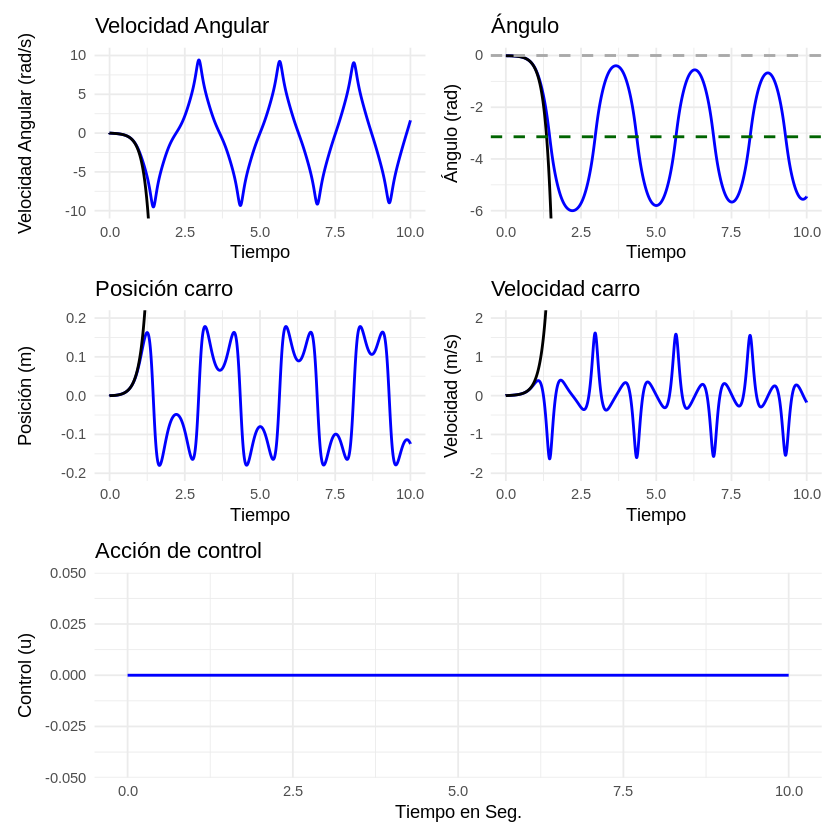


Tiempo de cálculo = 9.329803 segundos

--- Análisis de Autovalores para el Equilibrio Inestable ---

Autovalor 1: -4.8114 +0.0000i
  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)
  - Tasa de Decaimiento: 4.81
Autovalor 2: 4.7543 +0.0000i
  - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!
  - Tasa de Crecimiento: 4.75
Autovalor 3: -0.1428 +0.0000i
  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)
  - Tasa de Decaimiento: 0.14
Autovalor 4: 0.0000 +0.0000i
  - Comportamiento: Constante (punto de equilibrio o linea)

--- Verificación de Valores Detallada (Alfa) ---
Valores a t = 0.0000 s:
  Alfa_L (Lineal): -0.010000 rad
  Alfa_NL (No Lineal): -0.010000 rad
Valores a t = 0.0500 s (índice 501):
  Alfa_L (Lineal): -0.010286 rad
  Alfa_NL (No Lineal): -0.010286 rad
Valores a t = 0.1000 s (índice 1001):
  Alfa_L (Lineal): -0.011162 rad
  Alfa_NL (No Lineal): -0.011162 rad
Valores a t = 0.2000 s (índice 2001):
  Alfa_L (Lineal): 

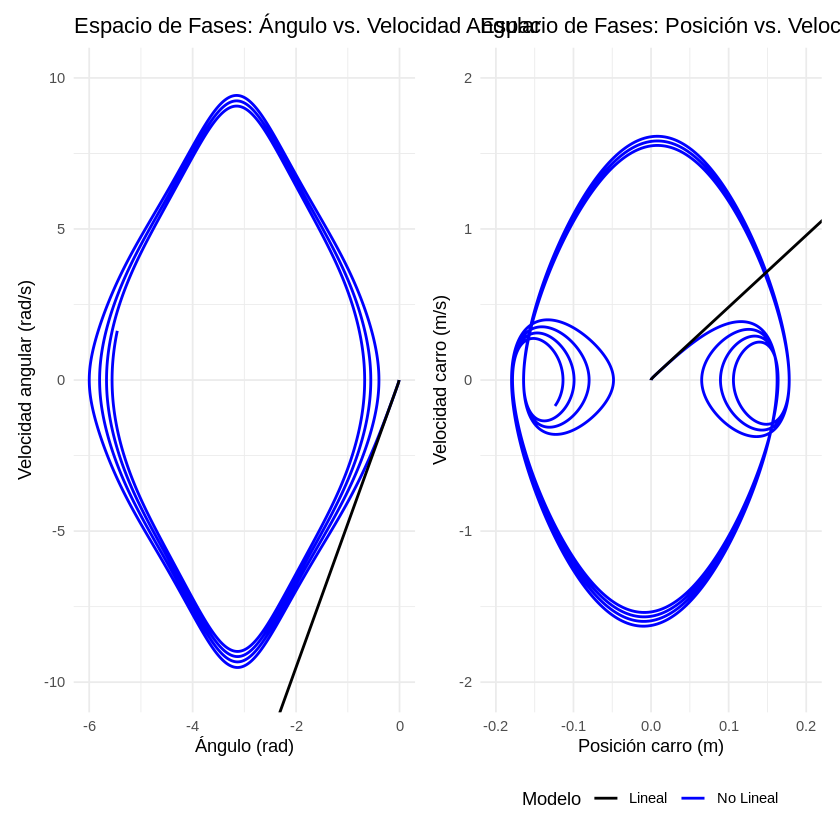

In [ ]:
# @title
library(ggplot2)
library(patchwork)
library(tidyr) # Necesario para pivot_longer

# --- Parámetros ---
m_val <- 0.2      # Masa del péndulo (kg)
Fricc_val <- 0.1   # Coeficiente de fricción
long_val <- 0.6  # Longitud del péndulo (m)
g_val <- 9.8     # Aceleración de la gravedad (m/s^2)
M_val <- 0.5     # Masa del carro (kg)
h_val <- 0.0001  # Paso de tiempo (s)
tiempo_final <- 10 # Tiempo total de simulación (s) - ¡MODIFICADO A 10 SEGUNDOS!
n_steps <- as.integer(tiempo_final / h_val) # Número de pasos

# --- Inicialización de vectores ---
omega <- numeric(n_steps + 1) # Velocidad angular del péndulo
alfa <- numeric(n_steps + 1)  # Ángulo del péndulo
p <- numeric(n_steps + 1)     # Posición del carro
p_p <- numeric(n_steps + 1)   # Velocidad del carro
u <- numeric(n_steps + 1)     # Acción de control (entrada), inicializada a ceros por defecto

# --- Condiciones iniciales (equilibrio inestable fi ≈ 0) ---
alfa[1] <- -0.01 # Pequeño desvío desde fi = 0
omega[1] <- 0
p[1] <- 0
p_p[1] <- 0
color_nl <- "blue" # Color para las curvas no lineales en los gráficos
color_l <- "black" # Color para las curvas lineales (asumido si no está definido)


# --- Matrices del sistema linealizado (equilibrio inestable fi ≈ 0) ---
Mat_A <- matrix(c(
  0, 1, 0, 0,
  0, -Fricc_val / M_val, -m_val * g_val / M_val, 0,
  0, 0, 0, 1,
  0, Fricc_val / (long_val * M_val), (M_val + m_val) * g_val / (long_val * M_val), 0
), nrow = 4, ncol = 4, byrow = TRUE)

Mat_B <- matrix(c(0, 1 / M_val, 0, 1 / (long_val * M_val)), nrow = 4, ncol = 1)

# --- Punto de equilibrio para la linealización ---
X0_eq <- c(0, 0, 0, 0)

# --- Inicialización resultados del sistema linealizado ---
x_linear <- c(p[1], p_p[1], alfa[1], omega[1]) # Estado inicial del sistema linealizado

pl <- numeric(n_steps + 1)    # Posición carro linealizada
p_pl <- numeric(n_steps + 1)  # Velocidad carro linealizada
alfal <- numeric(n_steps + 1) # Ángulo linealizado
omegal <- numeric(n_steps + 1) # Velocidad angular linealizada

# --- Simulación ---
start_time_r <- Sys.time() # Iniciar el temporizador

for (i in 1:n_steps) {
  # --- Simulación No Lineal ---
  sin_phi <- sin(alfa[i])
  cos_phi <- cos(alfa[i])

  A_nl <- matrix(c(
    1, m_val * long_val * cos_phi / (M_val + m_val),
    cos_phi / long_val, 1
  ), nrow = 2, ncol = 2, byrow = TRUE)

  b_nl <- c(
    (u[i] + m_val * long_val * omega[i]^2 * sin_phi - Fricc_val * p_p[i]) / (M_val + m_val),
    g_val * sin_phi / long_val
  )

  sol_nl <- tryCatch({
    solve(A_nl, b_nl)
  }, error = function(e) {
    c(0, 0) # Devuelve ceros si hay un error
  })

  p_pp_val <- sol_nl[1]
  tita_pp_val <- sol_nl[2] # Aceleración angular

  # Integración de Euler para el sistema No Lineal
  p_p[i + 1] <- p_p[i] + h_val * p_pp_val
  p[i + 1] <- p[i] + h_val * p_p[i]
  omega[i + 1] <- omega[i] + h_val * tita_pp_val
  alfa[i + 1] <- alfa[i] + h_val * omega[i]

  # --- Simulación Lineal ---
  pl[i] <- x_linear[1]
  p_pl[i] <- x_linear[2]
  alfal[i] <- x_linear[3]
  omegal[i] <- x_linear[4]

  xp_linear <- Mat_A %*% (x_linear - X0_eq) + Mat_B %*% u[i]
  x_linear <- x_linear + h_val * xp_linear
}

pl[n_steps + 1] <- x_linear[1]
p_pl[n_steps + 1] <- x_linear[2]
alfal[n_steps + 1] <- x_linear[3]
omegal[n_steps + 1] <- x_linear[4]

# --- Vector de tiempo para los gráficos ---
t_vector <- seq(0, tiempo_final, by = h_val)

# --- Preparar datos para ggplot2 ---
data_plot <- data.frame(
  Tiempo = t_vector,
  Omega_NL = omega,
  Alfa_NL = alfa,
  P_NL = p,
  Pp_NL = p_p,
  U = u,
  Omega_L = omegal,
  Alfa_L = alfal,
  P_L = pl,
  Pp_L = p_pl
)

# --- Verificación de Valores (Mantenido para depuración si es necesario) ---
cat("\n--- Verificación de Valores de Alfa ---\n")
idx_0_5s <- which.min(abs(t_vector - 0.5))
cat(sprintf("Valores a t = %.4f s (índice %d):\n", t_vector[idx_0_5s], idx_0_5s))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[idx_0_5s]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[idx_0_5s]))
cat("----------------------------------------\n")

# --- Gráficos con ggplot2 y patchwork ---

# Definir límites de Y específicos para una mejor visualización de la "caída"
y_lim_alfa_min <- -6 # Extendido a -6 radianes
y_lim_alfa_max <- 0  # Un poco por encima de 0

y_lim_omega_min <- -10.0 # Ajustado a -10 a 10
y_lim_omega_max <- 10.0

y_lim_p_min <- -0.2 # Ajustado para posición del carro
y_lim_p_max <- 0.2

y_lim_pp_min <- -2 # Ajustado para velocidad del carro
y_lim_pp_max <- 2


# 1. Plot de Velocidad Angular (Omega)
plot_omega <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Omega_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Omega_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  coord_cartesian(ylim = c(y_lim_omega_min, y_lim_omega_max)) + # ZOOM Y
  labs(title = "Velocidad Angular", y = "Velocidad Angular (rad/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 2. Plot de Ángulo (Alfa)
plot_alfa <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Alfa_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Alfa_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  geom_hline(yintercept = 0, color = "darkgrey", linewidth = 0.8, linetype = "dashed") + # Línea de equilibrio en 0
  geom_hline(yintercept = -pi, color = "darkgreen", linewidth = 0.8, linetype = "dashed") + # Línea de equilibrio en -pi
  coord_cartesian(ylim = c(y_lim_alfa_min, y_lim_alfa_max)) + # ZOOM Y
  labs(title = "Ángulo", y = "Ángulo (rad)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 3. Plot de Posición del Carro (p)
plot_p <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = P_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = P_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  coord_cartesian(ylim = c(y_lim_p_min, y_lim_p_max)) + # ZOOM Y
  labs(title = "Posición carro", y = "Posición (m)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 4. Plot de Velocidad del Carro (p_p)
plot_pp <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Pp_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Pp_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  coord_cartesian(ylim = c(y_lim_pp_min, y_lim_pp_max)) + # ZOOM Y
  labs(title = "Velocidad carro", y = "Velocidad (m/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 5. Plot de Acción de Control (u)
plot_u <- ggplot(data_plot, aes(x = Tiempo, y = U)) +
  geom_line(color = color_nl, linewidth = 0.8) +
  labs(title = "Acción de control", y = "Control (u)", x = "Tiempo en Seg.") +
  theme_minimal()

# --- Combinar los plots para la Figura 1 usando patchwork ---
fig1_combined <- (plot_omega | plot_alfa) / (plot_p | plot_pp) / plot_u +
  plot_layout(heights = c(1, 1, 1.2))

print(fig1_combined)

# --- Figura 2: Gráficos de Fase ---

# **NUEVO: Submuestreo de datos para los gráficos de fase**
subsample_factor <- 20 # Tomar 1 de cada 20 puntos
data_plot_subsampled <- data_plot[seq(1, nrow(data_plot), by = subsample_factor), ]

# 1. Espacio de Fases: Ángulo vs. Velocidad Angular (con linewidth muy pequeño y submuestreo)
plot_fase_alfa_omega <- ggplot(data_plot_subsampled, aes(x = Alfa_NL, y = Omega_NL)) + # Usar datos submuestreados
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) + # Volvemos a 0.05, con menos puntos no es necesario 0.01
  geom_path(aes(x = Alfa_L, y = Omega_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") + # Usar datos submuestreados
  labs(x = "Ángulo (rad)", y = "Velocidad angular (rad/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  coord_cartesian(xlim = c(y_lim_alfa_min, y_lim_alfa_max), ylim = c(y_lim_omega_min, y_lim_omega_max)) +
  theme_minimal() +
  ggtitle("Espacio de Fases: Ángulo vs. Velocidad Angular") + theme(legend.position = "none")

# 2. Espacio de Fases: Posición del Carro vs. Velocidad del Carro (con linewidth muy pequeño y submuestreo)
plot_fase_p_pp <- ggplot(data_plot_subsampled, aes(x = P_NL, y = Pp_NL)) + # Usar datos submuestreados
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) + # Volvemos a 0.05, con menos puntos no es necesario 0.01
  geom_path(aes(x = P_L, y = Pp_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") + # Usar datos submuestreados
  labs(x = "Posición carro (m)", y = "Velocidad carro (m/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  coord_cartesian(xlim = c(y_lim_p_min, y_lim_p_max), ylim = c(y_lim_pp_min, y_lim_pp_max)) +
  theme_minimal() +
  ggtitle("Espacio de Fases: Posición vs. Velocidad Carro") + theme(legend.position = "bottom")

# Combinar los plots para la Figura 2
fig2_combined <- plot_fase_alfa_omega | plot_fase_p_pp

print(fig2_combined)

# --- Guardar variables ---
# Se recomienda guardar en formato .RData para uso posterior en R
# save(alfa, omega, p, p_p, u, pl, p_pl, alfal, omegal, t_vector, file = "Datos_Controlador_VI.RData")

# --- Tiempo de cómputo ---
end_time_r <- Sys.time()
TCalculo <- as.numeric(difftime(end_time_r, start_time_r, units = "secs"))
cat("\nTiempo de cálculo =", TCalculo, "segundos\n")

# --- Análisis de Autovalores ---
# Calcular los autovalores de la matriz A del sistema linealizado
eigen_results_inestable <- eigen(Mat_A)
eigenvalues_inestable <- eigen_results_inestable$values

# Función para interpretar los autovalores
interpret_eigenvalues <- function(eigenvalues) {
  for (i in 1:length(eigenvalues)) {
    lambda <- eigenvalues[i]
    real_part <- Re(lambda)
    imag_part <- Im(lambda)

    cat(sprintf("Autovalor %d: %.4f %+.4fi\n", i, real_part, imag_part))

    if (abs(real_part) < 1e-5 && abs(imag_part) < 1e-5) {
      cat("  - Comportamiento: Constante (punto de equilibrio o linea)\n")
    } else if (abs(real_part) < 1e-5) {
      cat("  - Comportamiento: Oscilación Pura (Centro)\n")
      cat(sprintf("  - Frecuencia de Oscilación: %.2f rad/s\n", abs(imag_part)))
    } else if (real_part < 0) {
      if (abs(imag_part) < 1e-5) {
        cat("  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)\n")
        cat(sprintf("  - Tasa de Decaimiento: %.2f\n", abs(real_part)))
      } else {
        cat("  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)\n")
        cat(sprintf("  - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n", abs(imag_part)))
        cat(sprintf("  - Tasa de Amortiguación: %.2f\n", abs(real_part)))
      }
    } else {
      if (abs(imag_part) < 1e-5) {
        cat("  - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!\n")
        cat(sprintf("  - Tasa de Crecimiento: %.2f\n", real_part))
      } else {
        cat("  - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!\n")
        cat(sprintf("  - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n", abs(imag_part)))
        cat(sprintf("  - Tasa de Crecimiento: %.2f\n", real_part))
      }
    }
  }
}

cat("\n--- Análisis de Autovalores para el Equilibrio Inestable ---\n")
cat("\n")
interpret_eigenvalues(eigenvalues_inestable)

# --- Verificación de Valores ADICIONALES (para ver la divergencia inicial) ---
cat("\n--- Verificación de Valores Detallada (Alfa) ---\n")

# Valores a t = 0.00s
cat(sprintf("Valores a t = 0.0000 s:\n"))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[1]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[1]))

# Valores a t = 0.05s
idx_0_05s <- which.min(abs(t_vector - 0.05))
cat(sprintf("Valores a t = %.4f s (índice %d):\n", t_vector[idx_0_05s], idx_0_05s))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[idx_0_05s]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[idx_0_05s]))

# Valores a t = 0.10s
idx_0_10s <- which.min(abs(t_vector - 0.10))
cat(sprintf("Valores a t = %.4f s (índice %d):\n", t_vector[idx_0_10s], idx_0_10s))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[idx_0_10s]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[idx_0_10s]))

# Valores a t = 0.20s
idx_0_20s <- which.min(abs(t_vector - 0.20))
cat(sprintf("Valores a t = %.4f s (índice %d):\n", t_vector[idx_0_20s], idx_0_20s))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[idx_0_20s]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[idx_0_20s]))

cat("----------------------------------------\n")

Analisis de resultados

El comportamiento es similar al caso de m= 0.1. Aunque ha aumentado la amplitud de la respuesta del modelo no lineal para la posicion del carro y su velocidad.
Ademas, se observa que el modelo lineal representa al sistema solo hasta t= 0.5 s, aproximadamente. Simulaciones con t= 1 s muestran con mayor detalle la respuesta de ambos modelos cuando se diferencian.




3- Obtener la solución numérica de los dos sistemas, del lineal y del no lineal para evaluar cuantitativamente la equivalencia, modificando m de 0,1 a 0,01 y la longitud l a 1,2m.

Para el equilibrio estable

Iniciando simulación para Equilibrio Estable...
Simulación terminada. Tiempo de cálculo: 3.191549 segundos.


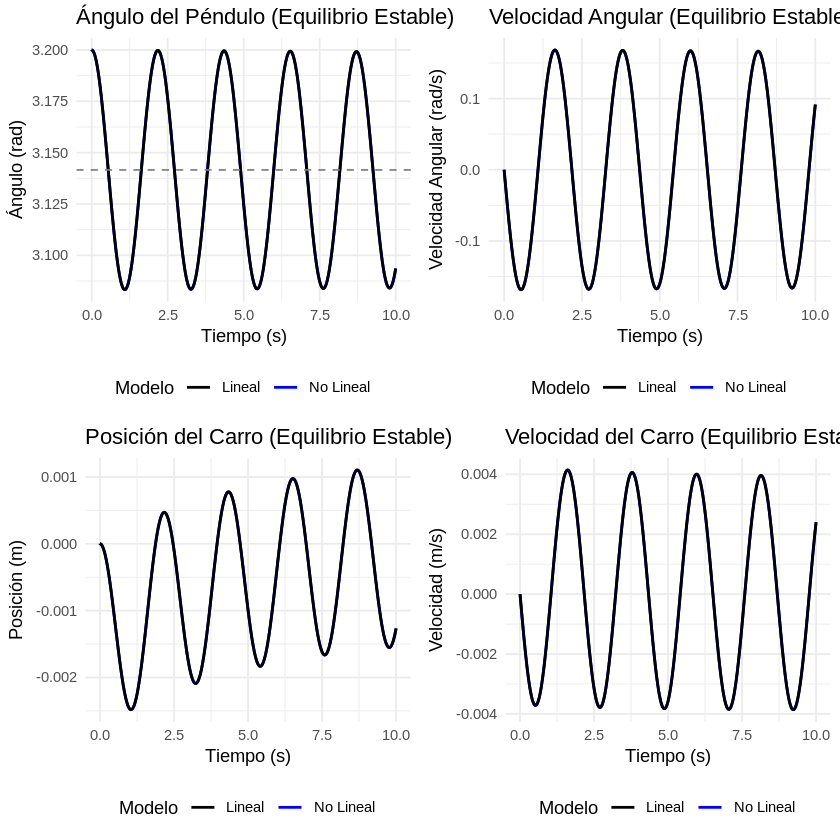

Autovalores para el Equilibrio Estable:Autovalor 1: -0.0020 + 2.8860i
  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)
  - Frecuencia natural de Oscilación (aproximada): 2.89 rad/s
  - Tasa de Amortiguación: 0.00
Autovalor 2: -0.0020 + -2.8860i
  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)
  - Frecuencia natural de Oscilación (aproximada): 2.89 rad/s
  - Tasa de Amortiguación: 0.00
Autovalor 3: -0.1961 + 0.0000i
  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)
  - Tasa de Decaimiento: 0.20
Autovalor 4: 0.0000 + 0.0000i
  - Comportamiento: Constante (punto de equilibrio o linea)
-----------------------------------------


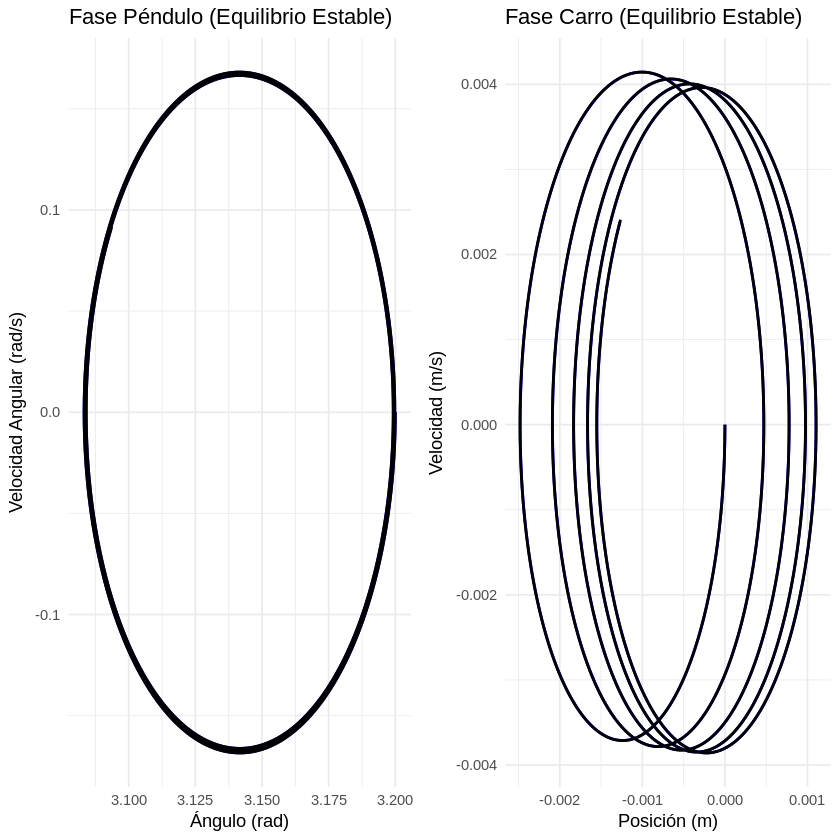

In [ ]:
# @title
# Limpiar el entorno de R
rm(list = ls())

# --- Instalación y Carga de Librerías ---
# Instalar gridExtra si no está instalado (solo la primera vez)
if (!requireNamespace("gridExtra", quietly = TRUE)) {
  install.packages("gridExtra")
}
# Cargar librerías
library(ggplot2)
library(gridExtra)

# --- Definición de Parámetros del Sistema ---
m_val <- 0.01       # Masa del péndulo (kg) - ACTUALIZADO
Fricc_val <- 0.1    # Coeficiente de fricción del carro (Ns/m)
long_val <- 1.2     # Longitud del péndulo (m) - ACTUALIZADO
g_val <- 9.8        # Aceleración de la gravedad (m/s^2)
M_val <- 0.5        # Masa del carro (kg)

# --- Configuración de la Simulación ---
h_val <- 0.0001     # Paso de tiempo (s) - ACTUALIZADO
tiempo_final <- 10   # Tiempo final de simulación (s)
num_pasos <- tiempo_final / h_val

# --- Condiciones Iniciales ---
# Modelo No Lineal
alfa <- numeric(num_pasos + 1)
omega <- numeric(num_pasos + 1)
p <- numeric(num_pasos + 1)
p_p <- numeric(num_pasos + 1)
u <- numeric(num_pasos + 1) # Acción de control (u=0 para lazo abierto)

alfa[1] <- 3.2       # Desvío del equilibrio estable (pi rad)
omega[1] <- 0
p[1] <- 0
p_p[1] <- 0
u[1] <- 0

# Modelo Linealizado (en el equilibrio estable: X0_eq = [0, 0, pi, 0]')
alfal <- numeric(num_pasos + 1)
omegal <- numeric(num_pasos + 1)
pl <- numeric(num_pasos + 1)
p_pl <- numeric(num_pasos + 1)

# Estado inicial para el modelo linealizado
X_lineal <- c(p[1], p_p[1], alfa[1], omega[1])
X0_eq_estable <- c(0, 0, pi, 0) # Punto de equilibrio para linealización

# ¡¡¡CORRECCIÓN AQUÍ!!! Inicializar los primeros valores para las variables linealizadas
pl[1] <- X_lineal[1]
p_pl[1] <- X_lineal[2]
alfal[1] <- X_lineal[3]
omegal[1] <- X_lineal[4]


# Matriz A del sistema linealizado en el equilibrio estable (phi = pi)
Mat_A_estable <- matrix(c(
  0, 1, 0, 0,
  0, -Fricc_val / M_val, -m_val * g_val / M_val, 0,
  0, 0, 0, 1,
  0, -Fricc_val / (long_val * M_val), -g_val * (m_val + M_val) / (long_val * M_val), 0
), nrow = 4, ncol = 4, byrow = TRUE)

# Matriz B del sistema linealizado
Mat_B <- matrix(c(0, 1/M_val, 0, 1/(long_val*M_val)), ncol = 1)

# --- Bucle de Simulación ---
cat("Iniciando simulación para Equilibrio Estable...\n")
tiempo_inicio <- Sys.time()

for (i in 1:num_pasos) {
  # --- Variables del Sistema No Lineal ---
  current_alfa <- alfa[i]
  current_omega <- omega[i]
  current_p_p <- p_p[i]
  current_u <- u[i]

  # Calcular cos y sin del ángulo actual para las ecuaciones no lineales
  cos_alfa <- cos(current_alfa)
  sin_alfa <- sin(current_alfa)

  # **CORRECCIÓN CLAVE: Resolver p_pp y tita_pp simultáneamente**
  # Matriz A_coupled_NL para el sistema de ecuaciones de aceleraciones
  A_coupled_NL <- matrix(c(
    (M_val + m_val), (m_val * long_val * cos_alfa),
    (m_val * long_val * cos_alfa), (m_val * long_val^2)
  ), nrow = 2, ncol = 2, byrow = TRUE)

  # Vector B_coupled_NL para el sistema de ecuaciones de aceleraciones
  B_coupled_NL <- c(
    (current_u - Fricc_val * current_p_p + m_val * long_val * current_omega^2 * sin_alfa),
    (m_val * g_val * long_val * sin_alfa)
  )

  # Resolver el sistema para obtener las aceleraciones (p_pp y tita_pp)
  accelerations_NL <- tryCatch({
    solve(A_coupled_NL, B_coupled_NL)
  }, error = function(e) {
    warning("Error al resolver el sistema de aceleraciones en el paso ", i, ": ", e$message)
    c(0, 0) # Devolver 0 para evitar que la simulación se detenga
  })

  p_pp_val <- accelerations_NL[1]
  tita_pp_val <- accelerations_NL[2]

  # Actualizar estados del modelo no lineal (Euler explícito)
  p_p[i+1] <- current_p_p + h_val * p_pp_val
  p[i+1] <- p[i] + h_val * current_p_p
  omega[i+1] <- current_omega + h_val * tita_pp_val
  alfa[i+1] <- current_alfa + h_val * current_omega

  # --- Sistema Linealizado ---
  # El modelo linealizado se calcula a partir de la desviación del equilibrio (X_lineal - X0_eq_estable)
  derivadas_lineal <- Mat_A_estable %*% (X_lineal - X0_eq_estable) + Mat_B %*% u[i]
  X_lineal <- X_lineal + h_val * derivadas_lineal

  # Almacenar estados del modelo linealizado
  pl[i+1] <- X_lineal[1]
  p_pl[i+1] <- X_lineal[2]
  alfal[i+1] <- X_lineal[3]
  omegal[i+1] <- X_lineal[4]
}
tiempo_fin <- Sys.time()
cat("Simulación terminada. Tiempo de cálculo:", difftime(tiempo_fin, tiempo_inicio, units = "secs"), "segundos.\n")

# --- Preparación para Graficar ---
tiempo <- seq(0, tiempo_final, by = h_val)
color_nl <- "blue" # Color para las curvas no lineales
color_l <- "black" # Color para las curvas lineales

# Crear un dataframe para ggplot2
df_estable <- data.frame(
  Tiempo = tiempo,
  Alfa_NL = alfa,
  Omega_NL = omega,
  P_NL = p,
  Pp_NL = p_p,
  Alfa_L = alfal,
  Omega_L = omegal,
  P_L = pl,
  Pp_L = p_pl
)

# Graficos de tiempo
plot_alfa_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = Alfa_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Alfa_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  geom_hline(yintercept = pi, linetype = "dashed", color = "gray50") + # Línea del equilibrio estable
  labs(title = "Ángulo del Péndulo (Equilibrio Estable)", y = "Ángulo (rad)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

plot_omega_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = Omega_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Omega_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Velocidad Angular (Equilibrio Estable)", y = "Velocidad Angular (rad/s)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

plot_p_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = P_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = P_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Posición del Carro (Equilibrio Estable)", y = "Posición (m)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

plot_pp_estable <- ggplot(df_estable, aes(x = Tiempo)) +
  geom_line(aes(y = Pp_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Pp_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Velocidad del Carro (Equilibrio Estable)", y = "Velocidad (m/s)", x = "Tiempo (s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "bottom")

# Gráficos de Fase
plot_fase_alfa_omega_estable <- ggplot(df_estable, aes(x = Alfa_NL, y = Omega_NL)) +
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) +
  geom_path(aes(x = Alfa_L, y = Omega_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Fase Péndulo (Equilibrio Estable)", x = "Ángulo (rad)", y = "Velocidad Angular (rad/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

plot_fase_p_pp_estable <- ggplot(df_estable, aes(x = P_NL, y = Pp_NL)) +
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) +
  geom_path(aes(x = P_L, y = Pp_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  labs(title = "Fase Carro (Equilibrio Estable)", x = "Posición (m)", y = "Velocidad (m/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# Mostrar los gráficos (puedes ajustar el layout)
grid.arrange(plot_alfa_estable, plot_omega_estable, plot_p_estable, plot_pp_estable, ncol = 2)
grid.arrange(plot_fase_alfa_omega_estable, plot_fase_p_pp_estable, ncol = 2)

# Guardar los gráficos si es necesario (descomentar para guardar)
# ggsave("equilibrio_estable_tiempo.png", plot = grid.arrange(plot_alfa_estable, plot_omega_estable, plot_p_estable, plot_pp_estable, ncol = 2), width = 10, height = 8)
# ggsave("equilibrio_estable_fase.png", plot = grid.arrange(plot_fase_alfa_omega_estable, plot_fase_p_pp_estable, ncol = 2), width = 10, height = 5)

# --- Análisis de Autovalores ---
# Calcular los autovalores de la matriz A del sistema linealizado
eigen_results_estable <- eigen(Mat_A_estable)
eigenvalues_estable <- eigen_results_estable$values

cat("Autovalores para el Equilibrio Estable:")
#print(eigenvalues_estable)

# Función para interpretar los autovalores (puedes copiarla y pegarla)
interpret_eigenvalues <- function(eigenvalues) {
    for (i in seq_along(eigenvalues)) {
    val <- eigenvalues[i]
    real_part <- Re(val)
    imag_part <- Im(val)

    cat(sprintf("Autovalor %d: %.4f + %.4fi\n", i, real_part, imag_part))

    # Comportamiento basado en la parte real e imaginaria
    if (abs(imag_part) > 1e-9) { # Si hay parte imaginaria significativa (oscilación)
      if (real_part < -1e-9) {
        cat("  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)\n")
        cat(sprintf("  - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n", abs(imag_part)))
        cat(sprintf("  - Tasa de Amortiguación: %.2f\n", -real_part))
      } else if (real_part > 1e-9) {
        cat("  - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!\n")
      } else {
        cat("  - Comportamiento: Oscilación Sostenida (Órbita)\n")
      }
    } else { # Si es puramente real (no oscila)
      if (real_part < -1e-9) {
        cat("  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)\n")
        cat(sprintf("  - Tasa de Decaimiento: %.2f\n", -real_part))
      } else if (real_part > 1e-9) {
        cat("  - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!\n")
      } else {
        cat("  - Comportamiento: Constante (punto de equilibrio o linea)\n")
      }
    }
  }
  cat("-----------------------------------------\n")
}

interpret_eigenvalues(eigenvalues_estable)


Analisis de los resultados

El sistema se comporta de manera similar a los casos anteriores, aunque ha disminuido la frecuencia natural a 2.89 rad/s, la tasa de amortiguacion a 0.002 y la tasa de decaimiento ha aumentado a 0.196.





Para el equilibrio inestable

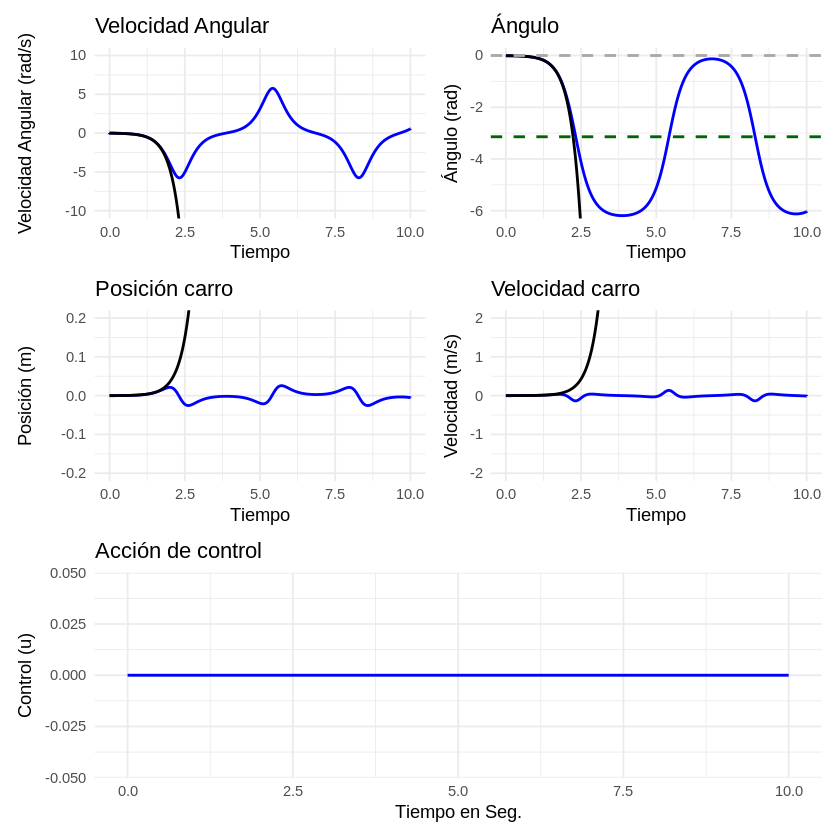


Tiempo de cálculo = 9.219377 segundos

--- Análisis de Autovalores para el Equilibrio Inestable ---

Autovalor 1: -2.8883 +0.0000i
  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)
  - Tasa de Decaimiento: 2.89
Autovalor 2: 2.8843 +0.0000i
  - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!
  - Tasa de Crecimiento: 2.88
Autovalor 3: -0.1961 +0.0000i
  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)
  - Tasa de Decaimiento: 0.20
Autovalor 4: 0.0000 +0.0000i
  - Comportamiento: Constante (punto de equilibrio o linea)

--- Verificación de Valores Detallada (Alfa) ---
Valores a t = 0.0000 s:
  Alfa_L (Lineal): -0.010000 rad
  Alfa_NL (No Lineal): -0.010000 rad
Valores a t = 0.5000 s (índice 5001):
  Alfa_L (Lineal): -0.022337 rad
  Alfa_NL (No Lineal): -0.022337 rad
Valores a t = 1.0000 s (índice 10001):
  Alfa_L (Lineal): -0.089754 rad
  Alfa_NL (No Lineal): -0.089733 rad
Valores a t = 2.0000 s (índice 20001):
  Alfa_L (Lineal

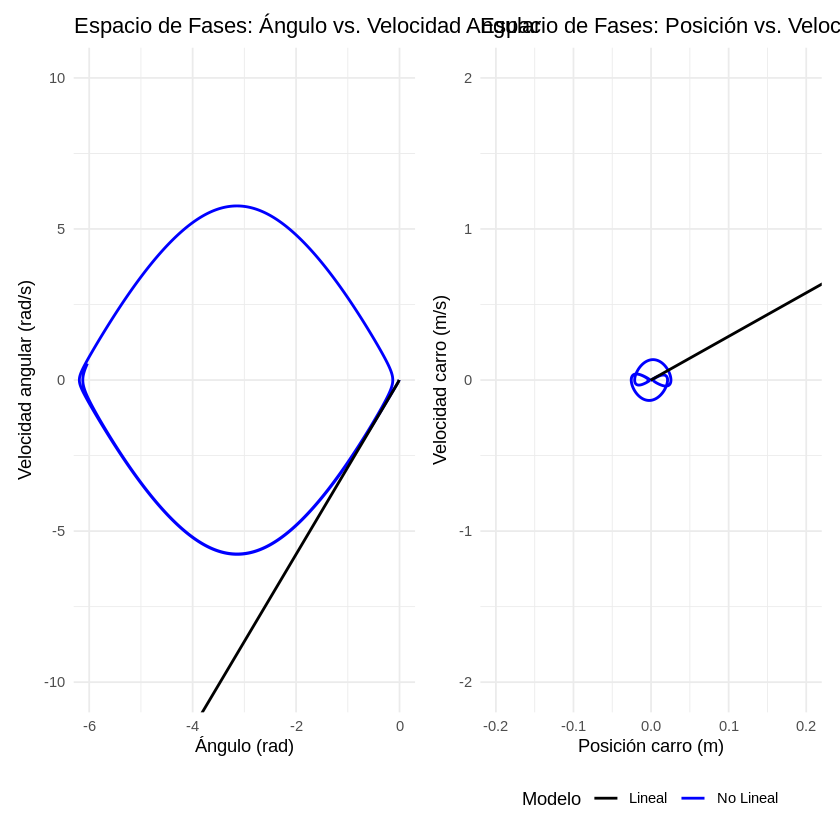

In [10]:
# @title
library(ggplot2)
library(patchwork)
library(tidyr) # Necesario para pivot_longer

# --- Parámetros ---
m_val <- 0.01      # Masa del péndulo (kg)
Fricc_val <- 0.1   # Coeficiente de fricción
long_val <- 1.2  # Longitud del péndulo (m)
g_val <- 9.8     # Aceleración de la gravedad (m/s^2)
M_val <- 0.5     # Masa del carro (kg)
h_val <- 0.0001  # Paso de tiempo (s)
tiempo_final <- 10 # Tiempo total de simulación (s) - ¡MODIFICADO A 10 SEGUNDOS!
n_steps <- as.integer(tiempo_final / h_val) # Número de pasos

# --- Inicialización de vectores ---
omega <- numeric(n_steps + 1) # Velocidad angular del péndulo
alfa <- numeric(n_steps + 1)  # Ángulo del péndulo
p <- numeric(n_steps + 1)     # Posición del carro
p_p <- numeric(n_steps + 1)   # Velocidad del carro
u <- numeric(n_steps + 1)     # Acción de control (entrada), inicializada a ceros por defecto

# --- Condiciones iniciales (equilibrio inestable fi ≈ 0) ---
alfa[1] <- -0.01 # Pequeño desvío desde fi = 0
omega[1] <- 0
p[1] <- 0
p_p[1] <- 0
color_nl <- "blue" # Color para las curvas no lineales en los gráficos
color_l <- "black" # Color para las curvas lineales (asumido si no está definido)


# --- Matrices del sistema linealizado (equilibrio inestable fi ≈ 0) ---
Mat_A <- matrix(c(
  0, 1, 0, 0,
  0, -Fricc_val / M_val, -m_val * g_val / M_val, 0,
  0, 0, 0, 1,
  0, Fricc_val / (long_val * M_val), (M_val + m_val) * g_val / (long_val * M_val), 0
), nrow = 4, ncol = 4, byrow = TRUE)

Mat_B <- matrix(c(0, 1 / M_val, 0, 1 / (long_val * M_val)), nrow = 4, ncol = 1)

# --- Punto de equilibrio para la linealización ---
X0_eq <- c(0, 0, 0, 0)

# --- Inicialización resultados del sistema linealizado ---
x_linear <- c(p[1], p_p[1], alfa[1], omega[1]) # Estado inicial del sistema linealizado

pl <- numeric(n_steps + 1)    # Posición carro linealizada
p_pl <- numeric(n_steps + 1)  # Velocidad carro linealizada
alfal <- numeric(n_steps + 1) # Ángulo linealizado
omegal <- numeric(n_steps + 1) # Velocidad angular linealizada

# --- Simulación ---
start_time_r <- Sys.time() # Iniciar el temporizador

for (i in 1:n_steps) {
  # --- Simulación No Lineal ---
  sin_phi <- sin(alfa[i])
  cos_phi <- cos(alfa[i])

  A_nl <- matrix(c(
    1, m_val * long_val * cos_phi / (M_val + m_val),
    cos_phi / long_val, 1
  ), nrow = 2, ncol = 2, byrow = TRUE)

  b_nl <- c(
    (u[i] + m_val * long_val * omega[i]^2 * sin_phi - Fricc_val * p_p[i]) / (M_val + m_val),
    g_val * sin_phi / long_val
  )

  sol_nl <- tryCatch({
    solve(A_nl, b_nl)
  }, error = function(e) {
    c(0, 0) # Devuelve ceros si hay un error
  })

  p_pp_val <- sol_nl[1]
  tita_pp_val <- sol_nl[2] # Aceleración angular

  # Integración de Euler para el sistema No Lineal
  p_p[i + 1] <- p_p[i] + h_val * p_pp_val
  p[i + 1] <- p[i] + h_val * p_p[i]
  omega[i + 1] <- omega[i] + h_val * tita_pp_val
  alfa[i + 1] <- alfa[i] + h_val * omega[i]

  # --- Simulación Lineal ---
  pl[i] <- x_linear[1]
  p_pl[i] <- x_linear[2]
  alfal[i] <- x_linear[3]
  omegal[i] <- x_linear[4]

  xp_linear <- Mat_A %*% (x_linear - X0_eq) + Mat_B %*% u[i]
  x_linear <- x_linear + h_val * xp_linear
}

pl[n_steps + 1] <- x_linear[1]
p_pl[n_steps + 1] <- x_linear[2]
alfal[n_steps + 1] <- x_linear[3]
omegal[n_steps + 1] <- x_linear[4]

# --- Vector de tiempo para los gráficos ---
t_vector <- seq(0, tiempo_final, by = h_val)

# --- Preparar datos para ggplot2 ---
data_plot <- data.frame(
  Tiempo = t_vector,
  Omega_NL = omega,
  Alfa_NL = alfa,
  P_NL = p,
  Pp_NL = p_p,
  U = u,
  Omega_L = omegal,
  Alfa_L = alfal,
  P_L = pl,
  Pp_L = p_pl
)



# --- Gráficos con ggplot2 y patchwork ---

# Definir límites de Y específicos para una mejor visualización de la "caída"
y_lim_alfa_min <- -6 # Extendido a -6 radianes
y_lim_alfa_max <- 0  # Un poco por encima de 0

y_lim_omega_min <- -10.0 # Ajustado a -10 a 10
y_lim_omega_max <- 10.0

y_lim_p_min <- -0.2 # Ajustado para posición del carro
y_lim_p_max <- 0.2

y_lim_pp_min <- -2 # Ajustado para velocidad del carro
y_lim_pp_max <- 2


# 1. Plot de Velocidad Angular (Omega)
plot_omega <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Omega_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Omega_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  coord_cartesian(ylim = c(y_lim_omega_min, y_lim_omega_max)) + # ZOOM Y
  labs(title = "Velocidad Angular", y = "Velocidad Angular (rad/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 2. Plot de Ángulo (Alfa)
plot_alfa <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Alfa_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Alfa_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  geom_hline(yintercept = 0, color = "darkgrey", linewidth = 0.8, linetype = "dashed") + # Línea de equilibrio en 0
  geom_hline(yintercept = -pi, color = "darkgreen", linewidth = 0.8, linetype = "dashed") + # Línea de equilibrio en -pi
  coord_cartesian(ylim = c(y_lim_alfa_min, y_lim_alfa_max)) + # ZOOM Y
  labs(title = "Ángulo", y = "Ángulo (rad)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 3. Plot de Posición del Carro (p)
plot_p <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = P_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = P_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  coord_cartesian(ylim = c(y_lim_p_min, y_lim_p_max)) + # ZOOM Y
  labs(title = "Posición carro", y = "Posición (m)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 4. Plot de Velocidad del Carro (p_p)
plot_pp <- ggplot(data_plot, aes(x = Tiempo)) +
  geom_line(aes(y = Pp_NL, color = "No Lineal"), linewidth = 0.8) +
  geom_line(aes(y = Pp_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") +
  coord_cartesian(ylim = c(y_lim_pp_min, y_lim_pp_max)) + # ZOOM Y
  labs(title = "Velocidad carro", y = "Velocidad (m/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  theme_minimal() + theme(legend.position = "none")

# 5. Plot de Acción de Control (u)
plot_u <- ggplot(data_plot, aes(x = Tiempo, y = U)) +
  geom_line(color = color_nl, linewidth = 0.8) +
  labs(title = "Acción de control", y = "Control (u)", x = "Tiempo en Seg.") +
  theme_minimal()

# --- Combinar los plots para la Figura 1 usando patchwork ---
fig1_combined <- (plot_omega | plot_alfa) / (plot_p | plot_pp) / plot_u +
  plot_layout(heights = c(1, 1, 1.2))

print(fig1_combined)

# --- Figura 2: Gráficos de Fase ---

# **NUEVO: Submuestreo de datos para los gráficos de fase**
subsample_factor <- 20 # Tomar 1 de cada 20 puntos
data_plot_subsampled <- data_plot[seq(1, nrow(data_plot), by = subsample_factor), ]

# 1. Espacio de Fases: Ángulo vs. Velocidad Angular (con linewidth muy pequeño y submuestreo)
plot_fase_alfa_omega <- ggplot(data_plot_subsampled, aes(x = Alfa_NL, y = Omega_NL)) + # Usar datos submuestreados
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) + # Volvemos a 0.05, con menos puntos no es necesario 0.01
  geom_path(aes(x = Alfa_L, y = Omega_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") + # Usar datos submuestreados
  labs(x = "Ángulo (rad)", y = "Velocidad angular (rad/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  coord_cartesian(xlim = c(y_lim_alfa_min, y_lim_alfa_max), ylim = c(y_lim_omega_min, y_lim_omega_max)) +
  theme_minimal() +
  ggtitle("Espacio de Fases: Ángulo vs. Velocidad Angular") + theme(legend.position = "none")

# 2. Espacio de Fases: Posición del Carro vs. Velocidad del Carro (con linewidth muy pequeño y submuestreo)
plot_fase_p_pp <- ggplot(data_plot_subsampled, aes(x = P_NL, y = Pp_NL)) + # Usar datos submuestreados
  geom_path(aes(color = "No Lineal"), linewidth = 0.8) + # Volvemos a 0.05, con menos puntos no es necesario 0.01
  geom_path(aes(x = P_L, y = Pp_L, color = "Lineal"), linewidth = 0.8, linetype = "solid") + # Usar datos submuestreados
  labs(x = "Posición carro (m)", y = "Velocidad carro (m/s)") +
  scale_color_manual(name = "Modelo", values = c("No Lineal" = color_nl, "Lineal" = color_l)) +
  coord_cartesian(xlim = c(y_lim_p_min, y_lim_p_max), ylim = c(y_lim_pp_min, y_lim_pp_max)) +
  theme_minimal() +
  ggtitle("Espacio de Fases: Posición vs. Velocidad Carro") + theme(legend.position = "bottom")

# Combinar los plots para la Figura 2
fig2_combined <- plot_fase_alfa_omega | plot_fase_p_pp

print(fig2_combined)

# --- Guardar variables ---
# Se recomienda guardar en formato .RData para uso posterior en R
# save(alfa, omega, p, p_p, u, pl, p_pl, alfal, omegal, t_vector, file = "Datos_Controlador_VI.RData")

# --- Tiempo de cómputo ---
end_time_r <- Sys.time()
TCalculo <- as.numeric(difftime(end_time_r, start_time_r, units = "secs"))
cat("\nTiempo de cálculo =", TCalculo, "segundos\n")

# --- Análisis de Autovalores ---
# Calcular los autovalores de la matriz A del sistema linealizado
eigen_results_inestable <- eigen(Mat_A)
eigenvalues_inestable <- eigen_results_inestable$values

# Función para interpretar los autovalores
interpret_eigenvalues <- function(eigenvalues) {
  for (i in 1:length(eigenvalues)) {
    lambda <- eigenvalues[i]
    real_part <- Re(lambda)
    imag_part <- Im(lambda)

    cat(sprintf("Autovalor %d: %.4f %+.4fi\n", i, real_part, imag_part))

    if (abs(real_part) < 1e-5 && abs(imag_part) < 1e-5) {
      cat("  - Comportamiento: Constante (punto de equilibrio o linea)\n")
    } else if (abs(real_part) < 1e-5) {
      cat("  - Comportamiento: Oscilación Pura (Centro)\n")
      cat(sprintf("  - Frecuencia de Oscilación: %.2f rad/s\n", abs(imag_part)))
    } else if (real_part < 0) {
      if (abs(imag_part) < 1e-5) {
        cat("  - Comportamiento: Decaimiento Exponencial (Convergencia Directa)\n")
        cat(sprintf("  - Tasa de Decaimiento: %.2f\n", abs(real_part)))
      } else {
        cat("  - Comportamiento: Oscilación Amortiguada (Espiral Convergente)\n")
        cat(sprintf("  - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n", abs(imag_part)))
        cat(sprintf("  - Tasa de Amortiguación: %.2f\n", abs(real_part)))
      }
    } else {
      if (abs(imag_part) < 1e-5) {
        cat("  - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!\n")
        cat(sprintf("  - Tasa de Crecimiento: %.2f\n", real_part))
      } else {
        cat("  - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!\n")
        cat(sprintf("  - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n", abs(imag_part)))
        cat(sprintf("  - Tasa de Crecimiento: %.2f\n", real_part))
      }
    }
  }
}

cat("\n--- Análisis de Autovalores para el Equilibrio Inestable ---\n")
cat("\n")
interpret_eigenvalues(eigenvalues_inestable)

# --- Verificación de Valores ADICIONALES (para ver la divergencia inicial) ---
cat("\n--- Verificación de Valores Detallada (Alfa) ---\n")

# Valores a t = 0.00s
cat(sprintf("Valores a t = 0.0000 s:\n"))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[1]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[1]))

# Valores a t = 0.05s
idx_0_05s <- which.min(abs(t_vector - 0.5))
cat(sprintf("Valores a t = %.4f s (índice %d):\n", t_vector[idx_0_05s], idx_0_05s))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[idx_0_05s]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[idx_0_05s]))

# Valores a t = 1.00s
idx_0_10s <- which.min(abs(t_vector - 1.00))
cat(sprintf("Valores a t = %.4f s (índice %d):\n", t_vector[idx_0_10s], idx_0_10s))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[idx_0_10s]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[idx_0_10s]))

# Valores a t = 2.00s
idx_0_20s <- which.min(abs(t_vector - 2.00))
cat(sprintf("Valores a t = %.4f s (índice %d):\n", t_vector[idx_0_20s], idx_0_20s))
cat(sprintf("  Alfa_L (Lineal): %.6f rad\n", alfal[idx_0_20s]))
cat(sprintf("  Alfa_NL (No Lineal): %.6f rad\n", alfa[idx_0_20s]))

cat("----------------------------------------\n")

Con la disminucion de la masa y el aumento de la longitud del pendulo se observa claramente una disminucion en la frecuencia de oscilacion para el angulo, la velocidad angular, la posicion del carro y su velocidad. A su vez la posicion del carro y su velocidad han disminuido en amplitud.

De la misma forma que para los casos anteriores, el modelo lineal representa bien al sistema para pequeños angulos.

INFORME

En el presente trabajo se ha realizado la simulacion de los sistemas dinamicos mediante los correspondientes script en lenguaje R.

- Circuito RLC: mediante un modelo lineal en variables de estado
- Altitud de un avion: mediante un modelo no lineal y tambien mediante un modelo lineal valido para pequeños angulos.  
- Pendulo invertido: mediante un modelo no lineal y tambien mediante un modelo lineal valido para pequeños angulos, con desviaciones del estado de equilibrio estable y del estado de equilibrio inestable.

Se obtuvieron las representaciones graficas de las variables de estado para cada caso.

Se analizaron los resultados obtenidos, en cuanto al comportamiento de cada sistema y a la concidencia entre los modelos lineales y los modelos no lineales.

No se abordó el cálculo simbolico en R.

Se advirtio que el trabajo presentado correspondiente al Modulo 1 Semana 3 se cometieron errores en la simulacion del pendulo invertido. En la declaracion de algunos parametros del sistema y en la interpretacion de los resultados para el equilibrio inestable. En este trabajo se subsanaron los errores.


